# Проект: "Ритейл — Анализ программы лояльности"

**Цель проведения проекта:**\
Изучить все собранные данные по продажам за период с 01.12.2016 8:26 по 28.02.2017 17:44, и определить эффективность внедренной программы лояльности. Показатели для оценки программы необходимо выбрать самостоятельно.

**Задачи проекта:**
1.	Произвести декомпозицию задач.
2.	Изучить полученные данные.
3.	Провести предобработку данных.
4.	Провести исследовательский анализ данных.
5.	Определить метрики для оценки бизнес показателей и провести их анализ.
6.	Сформулировать вывод об эффективности программы лояльности.
    - Если программа окажется эффективной, то предложить способы повышения ее эффективности и обосновать внедрение других программ;
    - Если программа окажется не эффективной, то предложить каких еще клиентов стоит подключить к программе лояльности.
7.	Сформулировать и проверить статистические гипотезы
8.	Подготовить презентацию.


## План проведения проекта:

1.	Загрузка и знакомство с данными\
    1.1 Подключить необходимые библиотеки\
    1.2 Загрузить данные из полученных файлов формата .csv\
    1.3 Обзор датасетов\
    1.3.1 Обзор первых десяти строк датасета retail_dataset\
    1.3.2 Обзор общей информации датасета retail_dataset\
    1.3.3 Обзор статистических данных retail_dataset\
    1.3.4 Обзор первых десяти строк датасета product_codes\
    1.3.5 Обзор общей статистической информации датасета product_codes
    
2.	Предобработка данных\
    2.1 Поиск и обработка явных и неявных дубликатов в product_codes\
    2.2 Изменение форматов значений в retail_dataset\
    2.3 Объединение двух датасетов\
    2.4 Приведение значений к формату правил хорошего тона\
    2.5 Поиск, обзор и удаление явных дубликатов\
    2.6 Заполнение пропусков\
    2.7 Обзор значений в столбце с данными о количестве товара (quantity)\
    2.8 Проверка и обработка аномальных значений количества покупок (quantity)\
    2.9 Добавление значений месяца формирования чека\
    2.10 Расчет суммы покупки\
    2.11 Выводы по разделу\
    
    
3.	Исследовательский анализ данных\
    3.1 Обзор периода исследования\
    3.2 Обзор уникальных значений магазинов\
    3.3 Обзор уникальных значений программ лояльности\
    3.2 Количество покупателей в разрезе категорий по признаку участия в программе лояльности\
    3.3 Обзор суммы покупок в разрезе категорий покупателей по признаку участия в программе лояльности\
    3.4 Количество товаров в покупках каждой из категории покупателей\
    3.5 Рейтинг популярности товаров по каждой категории покупателей\
    3.6 Выводы по разделу
    
4.	Работа с метриками и бизнес-показателями\
    4.1 Рассчет среднего чека покупателей в разрезе категорий по признаку участия в программе лояльности\
    4.2 Рассчет среднего количества покупателей в день по признаку участия в программе лояльности\
    4.3 Рассчет пожизненной ценности клиента LTV в зависимости от участия в программе лояльности\
    4.3.1 Формирование профилей покупателей\
    4.3.2 Формирования продаж в разрезе покупателей\
    4.3.3 Формирование функции для расчтеа LTV\
    4.3.4 Ввод начальных расчетных параметров\
    4.3.5 Вызов функции расчета LTV\
    4.3.6 Построение графиков LTV и динамики LTV покупателей\
    4.4 Выводы по разделу
    
5.	Проверка гипотез\
    5.1 Средний чек участников программы лояльности выше, чем у остальных покупателей\
    5.2 Среднее количество купленного товара у посетителей одинаково, не зависимо от участия в программе лояльности\
    5.3 Выводы по разделу
    
6.	Выводы и рекомендации для заказчика

## Загрузка и ознакомление с данными

### Подключение необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
from scipy import stats as st
from scipy.stats import mannwhitneyu

### Загрузка данных из полученных файлов формата .csv

In [2]:
# Используем метод try except на случай раличий в размешении исходных данных
try:
    retail_dataset = pd.read_csv('./datasets/retail_dataset.csv')
    product_codes=pd.read_csv('./datasets/product_codes.csv')
except:
    retail_dataset = pd.read_csv('/datasets/retail_dataset.csv')
    product_codes=pd.read_csv('/datasets/product_codes.csv')

Полученные данные из файлов retail_dataset.csv и product_codes.csv были подгружены в следующие датасеты:
- retail_dataset.csv выгружен в датасет retail_dataset и содержит данные о продажах товаров в разрезе покупателей, магазинах и статусе участия в программе лояльности покупателей
- product_codes.csv выгружен в датасет product_codes и содержит данные о товарах и их стоимости

### Обзор датасетов

#### Обзор первых десяти строк датасета retail_dataset

In [3]:
retail_dataset.head(10)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0
5,538379,22965,0,2016-12-12 11:26:00,22805.0,Shop 0,1.0
6,540468,22189,0,2017-01-07 13:55:00,NaN,Shop 0,0.0
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0.0
8,538883,22891,0,2016-12-14 15:56:00,NaN,Shop 0,0.0
9,539501,22372,0,2016-12-20 11:08:00,22764.0,Shop 0,1.0


Датасет содержит следующие значения стобцов данных:

- `purchaseId` — id чека;
- `item_ID` — id товара;
- `purchasedate` — дата покупки;
- `Quantity` — количество товара;
- `CustomerID` — id покупателя;
- `ShopID` — id магазина;
- `loyalty_program` — участвует ли покупатель в программе лояльности;

#### Обзор общей информации датасета retail_dataset

In [4]:
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


Из общих сведений о датасете можно сделать следующие выводы:
1. Всего 7 столбцов вместе с индексным
2. Наименования столбцов не соответствуют "правилам хорошего тона" при оформлении
3. Датасет содержит 10535 строк данных
4. В столбце CustomerID содержатся пропуски значений
5. Формат данных в столбце purchasedate не соответствует формату даты и времени
6. Формат данных в столбце CustomerID не соответствует назначению и требует переформатирования
7. Формат столбца loyalty_program целесообразней привести к формату int64

####  Обзор статистических данных retail_dataset

In [5]:
retail_dataset.describe()

,Quantity,CustomerID,loyalty_program
count,105335.000000,69125.000000,105335.000000
mean,7.821218,21019.302047,0.226345
std,327.946695,1765.444679,0.418467
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19544.000000,0.000000
50%,2.000000,20990.000000,0.000000
75%,7.000000,22659.000000,0.000000
max,74214.000000,23962.000000,1.000000


Статистический анализ данных столбца Quantity говорит о большом разбросе значений, что требует детального анализа на выбросы. Столбец CustomerID в дальнейшем будет переведен в формат object. Столбец loyalty_program имеет только два значения 0 и 1, что определяет участие покупателя в программе лояльности или нет.

#### Обзор первых десяти строк датасета product_codes

In [6]:
product_codes.head(10)

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39
5,22752,7.65
6,21730,4.25
7,22633,1.85
8,22632,1.85
9,84879,1.69


Датасет содержит следующие данные:
- `productID` — id товара;
- `price_per_one` — стоимость одной единицы товара;

#### Обзор общей информации датасета product_codes

In [7]:
product_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


При обзоре можно сделать следующие заключения:
1. Датасет содержит два столбца с данными
2. Датасет содержит 9969 строк данных
3. Пропуски в данных не обнаружены
4. Наименование столбцов привести к соотвестивию правилу хорошего тона
5. Тип данных соответствует назначению

#### Обзор общей статистической информации датасета product_codes

In [8]:
product_codes.describe()

,price_per_one
count,9969.000000
mean,19.503697
std,330.880754
min,0.000000
25%,1.250000
50%,2.550000
75%,5.510000
max,16888.020000


Статистические сведения цифровых данных показывает большой разброс значений, что требует дополнительного изучения и обработки

## Предобработка данных

### Поиск и обработка явных и неявных дубликатов в product_codes

Т.к. в предыдущем разделе при обзоре данных не было обнаружено пропусков, а так же типы данных соответствуют назначению, в данном разделе произведем только поиск и обработку явных и неявных дубликатов. Приведение наименований столбцов к правилам хорошего тона произведем после объединения датасета, с целью экономии строк кода.
Для начала посчитаем количество уникальных значений товаров

Для начала посчитаем количество уникальных значений товаров

In [9]:
# По данным из столбца 'productID' методом 'nunique' подсчитаем уникальные значения
product_codes['productID'].nunique()

3159

Таким образом из 9969 строк датасета только 3159 являются уникальными. Это говорит о том, что значения о товарах в датасете повторяются и необходимо избавиться от дубликатов, но перед этим изучить какие уникальные значения дубликатов имеют частые повторы. Для этого применим группировку данных, сделаем срез по повторяющимся значениям более одного повтора и отсортируем по уменьшению.

In [10]:
# Используем метод 'groupby' в котором посчитаем количество повторов уникальных значений методом 'nuinque', после чего,
# по полученной группировке сделаем срез методом 'query' и отсортируем методом 'sort_values' по убыванию значений повторов
product_codes.groupby('productID', as_index=False).nunique()\
    .query('price_per_one > 1').sort_values(by='price_per_one', ascending=False)

,productID,price_per_one
3150,DOT,174
3151,M,59
3153,S,29
3152,POST,15
3139,D,13
...,...,...
729,21705,2
2345,84584,2
723,21695,2
720,21692,2


По результатам полученного среза, при котором были выведены результаты фиксации уникального значения id продукта, более чем один раз. Т.о. в 2494 строках из 9969, дублирование цены происходит более одного раза, что само по себе некорректно в отрыве от даты.\
Посмотрим, сколько повторов значений цены у 5% датасета.

In [11]:
# Используем функцию percentile с аргументом 95 (или 5% от общего количества) из библиотеки numpy 
# к столбцу 'price_per_one', полученному в результате группировки.
np.percentile((product_codes.groupby('productID', as_index=False).nunique()['price_per_one']), 95)

6.0

В 5% случаев, повтор цены происходит чаще 6-ти и более раз. Это еще раз говорит о том, что в данных много дубликатов, при этом значения могут иметь и не одинаковую цену. Проверим это:

In [12]:
# Сгруппируем данные по столбцу 'productID'. Используем метод 'agg' с аргументами 'min', 'mean', 'max' 
# для обзора разброса значений стоимости товара в столбце 'price_per_one'. После чего используем сортировку 
# по значениям в столбце max. И в заключении сделаем сбор индексов методом 'reset_index'
product_codes.groupby('productID')['price_per_one']\
    .agg({'min', 'mean','max'})\
    .sort_values(by='max', ascending=False)\
    .reset_index()

,productID,min,mean,max
0,AMAZONFEE,1.00,9268.762222,16888.02
1,M,0.19,253.765932,1715.85
2,BANK CHARGES,15.00,385.947500,1050.15
3,DOT,2.51,278.734425,950.99
4,22655,125.00,228.500000,295.00
...,...,...,...,...
3154,35951,0.00,0.000000,0.00
3155,72814,0.00,0.000000,0.00
3156,84612B,0.00,0.000000,0.00
3157,35969,0.00,0.000000,0.00


Наше предположение было верное. Разброс значений цены в ряде случаев носит колоссальный характер. Различие в ценах может достигать 16888 раз, как видно их строки 0 по товару AMAZONFEE. Возможно в лог данных записывались все значения цены на один и тот же товар.\
В данном случае целесообразно привести все цены к медианному значению, что позволит в дальнейшем, боле менее корректно, рассчитать сумму покупки по чекам покупателей обеих когорт.\
Рассчитаем медианное значение цен по уникальным товарам и запишем их в переменную price.


In [13]:
# В переменную 'price' запишем сгруппированные данные из 'product_codes' методом 'groupby' с применением метода agg 
# с аргументом 'median' и сортировкой по полученным значениям методом 'sort_values' с аргументом 'ascending=False'

price = product_codes.groupby('productID')['price_per_one']\
    .agg({'median'})\
    .sort_values(by='median', ascending=False)\
    .reset_index()
price

,productID,median
0,AMAZONFEE,6706.71
1,22655,265.50
2,DOT,198.19
3,22826,175.00
4,22827,155.00
...,...,...
3154,84227,0.00
3155,85110,0.00
3156,84509F,0.00
3157,35991,0.00


In [14]:
# Переименуем столбцы в таблице 'price' методом 'columns'. Переименование 'productID' в 'item_ID' необходимо для
# последующего объединения датасетов:

price.columns=['item_ID', 'price_per_one']
price.head(5)

,item_ID,price_per_one
0,AMAZONFEE,6706.71
1,22655,265.50
2,DOT,198.19
3,22826,175.00
4,22827,155.00


### Изменение форматов значений в retail_dataset

В соответствии с назначением данных, приведем их к нужному формату:
1. purchasedate приведем к формату datetime
2. CustomerID приведем к формату object
3. loyalty_program приведем к формату int64

In [15]:
# Применим функцию 'to_datetime' из библиотеки 'pandas' с аргументом 'format' которому зададим 
# формат год-месяц-день час:минуты:секунды
retail_dataset['purchasedate'] = pd.to_datetime(retail_dataset['purchasedate'], format='%Y-%m-%d %H:%M:%S')

In [16]:
# Используем метод 'astype' и зададим значение 'object', чтобы конвертировать значения в столбце 'CustomerID',\
# в советующий тип:
retail_dataset['CustomerID'] = retail_dataset['CustomerID'].astype('object')

In [17]:
# Используем тот же метод astype к столбцу 'loyalty_program', но уже со значением 'init64', 
# что сковертирует данные в целочисленный фломат:
retail_dataset['loyalty_program'] = retail_dataset['loyalty_program'].astype('int64')

### Объединение двух датасетов

Объединим данные из датасета *retail_dataset* и *price* в один и запишем все в переменную *data*.

In [18]:
# Для объединения датасетов используем метод 'merge'.
# В качестве элемента по которому будет это буде производится, выберем общее значение 'item_ID':

data = retail_dataset.merge(price, on='item_ID')

# Выведем первые 10 строк полученного результата
data.head(10)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,1.63
1,541104,21873,0,2017-01-13 14:29:00,NaN,Shop 0,0,1.63
2,540418,21873,1,2017-01-07 11:04:00,NaN,Shop 0,0,1.63
3,541516,21873,2,2017-01-18 17:34:00,NaN,Shop 0,0,1.63
4,541566,21873,35,2017-01-19 11:50:00,23401.0,Shop 0,1,1.63
5,538843,21873,1,2016-12-14 13:18:00,21712.0,Shop 0,0,1.63
6,540838,21873,11,2017-01-11 15:13:00,19541.0,Shop 0,0,1.63
7,543592,21873,5,2017-02-10 11:57:00,22922.0,Shop 0,1,1.63
8,544651,21873,71,2017-02-22 12:51:00,19373.0,Shop 0,0,1.63
9,545062,21873,0,2017-02-27 14:07:00,18427.0,Shop 0,0,1.63


### Приведение значений к формату правил хорошего тона

In [19]:
# Используем метод 'columns' совместно с с методом 'str.lower' к датасету 'data'. 
# Что переведет все буквы в наименованиях всех колонок к нижнему регистру, что соответствует правилам хорошего тона.

data.columns = data.columns.str.lower()
data.head(10)

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,1.63
1,541104,21873,0,2017-01-13 14:29:00,NaN,Shop 0,0,1.63
2,540418,21873,1,2017-01-07 11:04:00,NaN,Shop 0,0,1.63
3,541516,21873,2,2017-01-18 17:34:00,NaN,Shop 0,0,1.63
4,541566,21873,35,2017-01-19 11:50:00,23401.0,Shop 0,1,1.63
5,538843,21873,1,2016-12-14 13:18:00,21712.0,Shop 0,0,1.63
6,540838,21873,11,2017-01-11 15:13:00,19541.0,Shop 0,0,1.63
7,543592,21873,5,2017-02-10 11:57:00,22922.0,Shop 0,1,1.63
8,544651,21873,71,2017-02-22 12:51:00,19373.0,Shop 0,0,1.63
9,545062,21873,0,2017-02-27 14:07:00,18427.0,Shop 0,0,1.63


###  Поиск, обзор и удаление явных дубликатов

Сделаем обзор данных на предмет явных дубликатов

In [20]:
# используем метод 'duplicated' и sum к датасету 'data': 

data.duplicated().sum()

1033

В датасете оказалось 1033 строки с полностью совпадающими данными. Возможно это ошибочные регистрации дублей чеков при сбоях обработки банковских транзакций.  Это менее 1% от всех данных. Необходимо удалить данные строки.

In [21]:
# Функция 'drop_duplicates' позволяем обнаружить и удалить полные дубли строк в датасете.
# После чего необходимо будет перестроить индексы методом 'reset_index':

data=data.drop_duplicates().reset_index(drop=True)

Произведем обзор полученного датасета *data* после проведенных трансформаций

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104302 entries, 0 to 104301
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchasedate     104302 non-null  datetime64[ns]
 4   customerid       68154 non-null   object        
 5   shopid           104302 non-null  object        
 6   loyalty_program  104302 non-null  int64         
 7   price_per_one    104302 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.4+ MB


Очистка данных прошла успешно. В датасете осталась основная масса строк, при этом были удалены полные дубли строк.

### Заполнение пропусков

Датасет содержит один столбец с данными в которых наблюдаются пропуски, это customerid (id покупателя).

In [23]:
# Используем методы 'isna' и sum к столбцу 'customerid', что позволит подсчитать количество пропусков в даннм столбце.
# Вывод сделаем в формате 'f-строки':

f'Количество срок с пропусками: {data["customerid"].isna().sum()}'

'Количество срок с пропусками: 36148'

Такое количество срок с пропусками игнорировать нельзя, т.к. это составляет почти 35% датасета. В данном случае пропуски возможны по причине особенности настройки регистрационной системы, позволяющей без регистрации оформлять покупки, что повышает привлекательность магазина со стороны ряда покупателей. Из этого следует оставить данные строки, а для идентификации запишем в id покупателя значение "not_reg"

In [24]:
# для подсчета уникальных пользователей используем метод 'nunique'. Вывод сделаем также 'f-строкой'
f'Количество зарегистрированных уникальных пользователей: {data["customerid"].nunique()}'

'Количество зарегистрированных уникальных пользователей: 1749'

In [25]:
# Для заполнения пропусков используем метод 'fillna' со значением 'not_reg' и выведем уникальные записи методом 'unique':

data['customerid'] = data['customerid'].fillna('not_reg')
data['customerid'].unique()

array([18427.0, 'not_reg', 23401.0, ..., 22417.0, 18025.0, 22258.0],
      dtype=object)

Как видно, в столбце customerid датасета появилось уникальное значение 'not_reg', которое обозначает, что покупка была совершена не зарегистрированным пользователем.
Далее проверим результат по всем проведенным операциям над датасетом:

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104302 entries, 0 to 104301
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchaseid       104302 non-null  object        
 1   item_id          104302 non-null  object        
 2   quantity         104302 non-null  int64         
 3   purchasedate     104302 non-null  datetime64[ns]
 4   customerid       104302 non-null  object        
 5   shopid           104302 non-null  object        
 6   loyalty_program  104302 non-null  int64         
 7   price_per_one    104302 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.4+ MB


В датасете пропусков нет.

### Обзор значений в столбце с данными о количестве товара (quantity)

Проверим, имеются ли чеки в которых количество товаров = 0

In [27]:
# Используем логическую фильтрацию и подсчитаем количество значений методом 'count', удовлетворяющих условию фильтра:
data[data['quantity']==0]['quantity'].count()

32362

Таким образом видим, что во всех зарегистрированных чеках имеется 32362 позиций товаров с количеством равным нулю.\
Далее проверим каков процент таких строк в датасете:

In [28]:
# К столбцу 'quantity' применим метод 'describe':

data['quantity'].describe()

count    104302.000000
mean          7.883003
std         329.565540
min      -74216.000000
25%           0.000000
50%           2.000000
75%           7.000000
max       74214.000000
Name: quantity, dtype: float64

Как видим, в 25% строк присутствуют позиции, в которых проданных товаров равно нулю. Это достаточно большой процент данных, чтобы можно было без ущерба от них избавиться. Но и заменить, на какие-либо произвольные данные, мы тоже не можем, т.к. это все повлияет на конечный результат исследования.\
Был сделан запрос к заказчику о статусе данных значений в чеках. На это был получен ответ, что эти сведения ошибочны. Значит, эти ошибочные данные необходимо удалить, не смотря на их количество.

Также, обращают на себя внимание отрицательные значения по количеству купленных товаров. Информации о назначении такого рода значений от заказчика не поступало. Можно предположить, что они могут означать возврат товаров по причине брака или несоответствия. Это необходимо проверить.

Т.о. отрицательные значения требуют изучения, а вот от нулевых значений стоит избавиться.



#### Проверка гипотезы отрицательных значений количества товаров, зарегистрированных в чеках.

Сформируем отдельные тестовые датафреймы для изучения гипотезы о назначении отрицательных значений. Цели исследования состоит в том, что будет проведено ранжирование количества товаров по их формату, далее составим сводные данные в котрых сгруппируем id покупателя и купленные им id товары в количественном выражении, а также id товаров, котрые данный покупатель вернул. И если разница между id покупок и id возвратов будет равна нулю, то тогда это и будет списком, сооветсвующим гипотезе. Если такой список будет содержать большинство строк по возвратам, то гипотезу примем, в противном случае ее отвегнем. В случае не подтверждении выдвеннутой гипотезы, все отрицательные значения будут удалены из основного датасета.

In [29]:
# Формируем новый датафрейм для проведения анализа
test=data

# Отбрасываем ошибки, связанные с нулевым количеством товара в чеке методом 'query', задав логическое 'НЕ равное' нулю
test=test.query('quantity !=0')

# Создадим пустой столбец под будующее ранжирование 
test['sale_ststus']=True

# Отранжируем все положительные значения и запишем в столбец 'sale_ststu' статус 'sales_item'
test['sale_ststus']=test.query('quantity > 0')['sale_ststus'].replace(to_replace=True, value="sales_item")

# Все оставшиеся пустые значения это возвраты и придадим им статус 'return_item'
test['sale_ststus']=test['sale_ststus'].fillna('return_item')

# Проверим, нет ли посторонних значений статусов в столбце 'sale_ststus'
test['sale_ststus'].unique()

D:\TMP\ipykernel_2268\2891545958.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sale_ststus']=True
D:\TMP\ipykernel_2268\2891545958.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sale_ststus']=test.query('quantity > 0')['sale_ststus'].replace(to_replace=True, value="sales_item")
D:\TMP\ipykernel_2268\2891545958.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

array(['sales_item', 'return_item'], dtype=object)

In [30]:
# Подсчитаем количественные значения статусов по продажам и возвратам методом 'value_counts'
test['sale_ststus'].value_counts()

sales_item     69864
return_item     2076
Name: sale_ststus, dtype: int64

В датасете 69864 ед. товаров купленных каждым покупателем и 2076 ед. ими, условно, возвращенных покупок.
Далее сгруппируем датасет по уникальному пользователю, id товаров, которые он купил после чего подсчитаем это количество товара и количество его возвратов. В отельном столбце *control_column* высчитаем разницу межу покупками и модулем возвратов. И в заключении отфильтруем только нулевые значения в столбце *control_column*:

In [31]:
# Сводную таблицу данных из датасета 'test' создаем методом 'pivot_table' по столбцам 'customerid' и 'item_id'. 
# Значения берем из столбца 'quantity' и применяем агрегирующую функцию 'aggfunc' с аргументом 'sum'.
# Полученный результат запишем в переменную 'test_group':
test_group=test.pivot_table(index=['customerid', 'item_id'], columns='sale_ststus', values='quantity', aggfunc=('sum'))

# Вычислим разность между купленными товарами 'sales_item' и возвращенными товарами 'return_item':
test_group['control_column'] = test_group['sales_item'] - abs(test_group['return_item'])

# Выведем полученный результат, предварительно отфильтровав методом 'query' по значениям в контрольной колонке 
# 'control_column', в которой значения будут равны 0 
print(test_group.query('control_column == 0').head(10))

# Для разделения предыдущего вывода и последующего, выведем пустую строку:
print()

# Выведем подсчет количества строк, в которых значения 'control_column' будут равны нулю:
print(f'Количество строк id купленных товаров совпавшими с возвратами :\
    {test_group.query("control_column == 0")["control_column"].count()}')

sale_ststus         return_item  sales_item  control_column
customerid item_id                                         
18141.0    21730           -2.0         2.0             0.0
18173.0    21843           -2.0         2.0             0.0
18180.0    22138           -2.0         2.0             0.0
           22654           -2.0         2.0             0.0
18219.0    21843           -7.0         7.0             0.0
18305.0    37495           -3.0         3.0             0.0
18326.0    21452           -5.0         5.0             0.0
18533.0    22189           -2.0         2.0             0.0
18757.0    21463           -2.0         2.0             0.0
18768.0    84078A         -13.0        13.0             0.0

Количество строк id купленных товаров совпавшими с возвратами :    56


Как видим, всего 56 id возвращенных товаров совпало с купленными конкретными покупателями. С определенной долей вероятности можно предположить, что отрицательные значения, также ошибочны и их стоит также удалить из исходного датасета.

Подсчитаем количество строк со значениями равным нулю и меньше его.

In [32]:
# Подсчет строк производим методом 'count', предварительно выполнив фильтрацию в столбке 'quantity',
# где значения будут меньше или равны нулю. Вывод сделаем с помощью 'f-строки':
f'Количество строк с нулевым значением количества товаров : {data.query("quantity <= 0")["purchaseid"].count()}'

'Количество строк с нулевым значением количества товаров : 34438'

#### Удаление строк в датасете *data* с нулевыми и отрицательными значениями количества товара

Для избавления от строк с отрицательным и нулевым значениям количества проданного товара, используем метод логической фильтрации, но только выберем все строки, в которых значения будут больше нуля, и перезапишем полученный результат в *data*. Т.о. в датасет попадут строки только с положительными значениями столбца 'quantity', а ошибочные данные будут отброшены, благодаря логической фильтрации.

In [33]:
# Для удаления строк используем метод 'query' с аргуметном больше 0:
data = data.query("quantity > 0")

# Полученный результат выведем функцией 'info'
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69864 entries, 0 to 104300
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchaseid       69864 non-null  object        
 1   item_id          69864 non-null  object        
 2   quantity         69864 non-null  int64         
 3   purchasedate     69864 non-null  datetime64[ns]
 4   customerid       69864 non-null  object        
 5   shopid           69864 non-null  object        
 6   loyalty_program  69864 non-null  int64         
 7   price_per_one    69864 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 4.8+ MB


В данном разделе проведена очистка данных от ошибочных значений по количеству товаров. Были удалены строки с нулевыми и отрицательными значениями, что обеспечит более качественный результат исследований. Заказчику необходимо дать рекомендации по качеству ведения отчетов с данными.

### Проверка и обработка аномальных значений количества покупок (quantity)

Для начала делаем обзор статистической нформации датасета data по столбцу quantity

In [34]:
data['quantity'].describe()

count    69864.000000
mean        13.480004
std        285.884978
min          1.000000
25%          2.000000
50%          5.000000
75%         11.000000
max      74214.000000
Name: quantity, dtype: float64

Как видим, разброс значений достаточно большой, причем 75% значений лежит в пределах от 1 до 11, при этом максимальное значение в данном наборе 74214. Это говорит о наличии выбросов. Теперь выведем эту информацию на графике, чтобы оценить масштабы разброса значений.

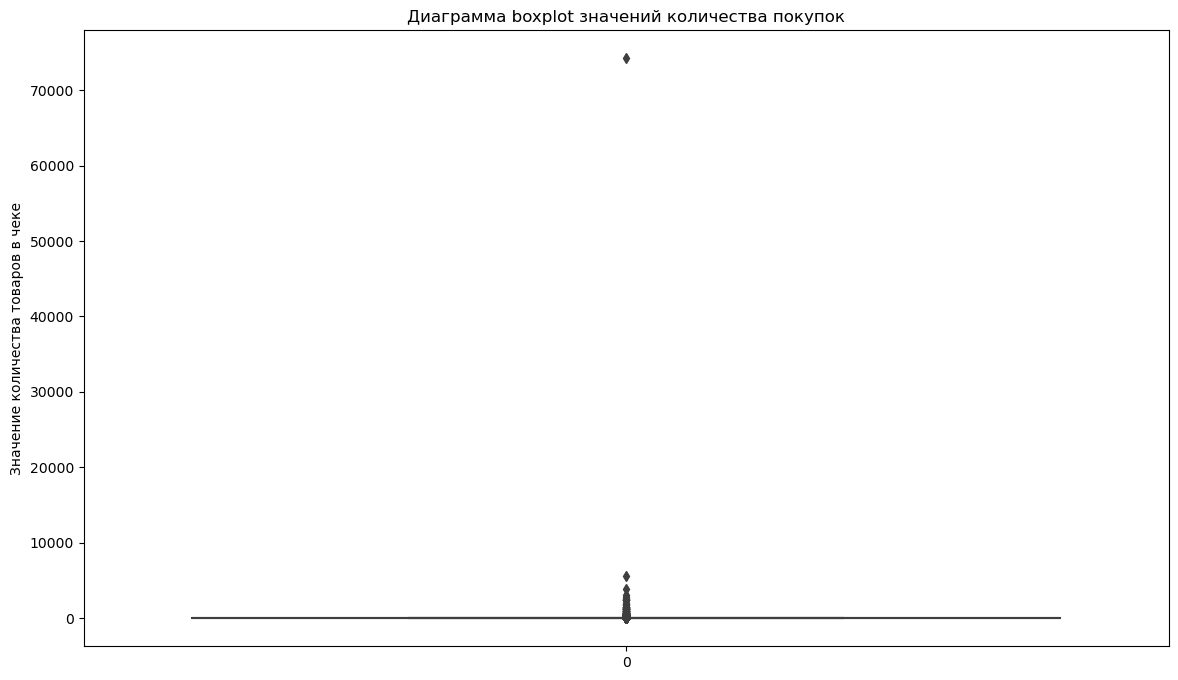

In [35]:
# Для вывода графика используем 'boxplot' из библиотеки 'seaborn' с настройками размера вывода графика 'figure'
# с аригументами 'figsize 14х8':
plt.figure(figsize=(14, 8))
sns.boxplot(data=data['quantity'])
plt.title('Диаграмма boxplot значений количества покупок')
plt.ylabel('Значение количества товаров в чеке')
plt.show()

Из диаграммы абсолютно не возможно сделать какие-либо выводы, из-за большого по своему значению единичного выброса. Определим 5%  значений, котрые явно выбиваются из общего датасета.

In [36]:
# Для оценики значения попадающих в обозначеную выборку выше границы 95% значений, используем метод 'percentile' 
# из библиотеки numpy. Полученные данные запишем в переменную 'percentile_quantity'
percentile_quantity = np.percentile(data['quantity'], 95)
percentile_quantity

39.0

Из анализа перцентелей можно сделать вывод, что лишь 5% датсета имеют значения количества товара выше 39 единиц.\
Отсечем выпадающие значения, для дальнейших исследований

In [37]:
# Используем логическую фильтрацию методом 'query', в котором зададим выбор значений столбца 'quantity' меньше 
# переменной 'percentile_quantity' и перезапишем получившуюся выборку в 'data'

data=data.query('quantity < @percentile_quantity')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66357 entries, 0 to 104300
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchaseid       66357 non-null  object        
 1   item_id          66357 non-null  object        
 2   quantity         66357 non-null  int64         
 3   purchasedate     66357 non-null  datetime64[ns]
 4   customerid       66357 non-null  object        
 5   shopid           66357 non-null  object        
 6   loyalty_program  66357 non-null  int64         
 7   price_per_one    66357 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 4.6+ MB


После урезания датафрейма осталось 66357 строк, но остались только качественные значения, которые способствуют корректным и правильным результатам, именно по ним будут приниматься корректные решения.\
Проверим статистические данные из quantity.

In [38]:
# Для проверки повторно используем метод 'describe'
data['quantity'].describe()

count    66357.000000
mean         6.964570
std          7.225377
min          1.000000
25%          2.000000
50%          5.000000
75%         11.000000
max         38.000000
Name: quantity, dtype: float64

Как видно из полученного вывода, отсечка значений больше 39 прошла успешно.\
Повторно выведем график разброса значений quantity.

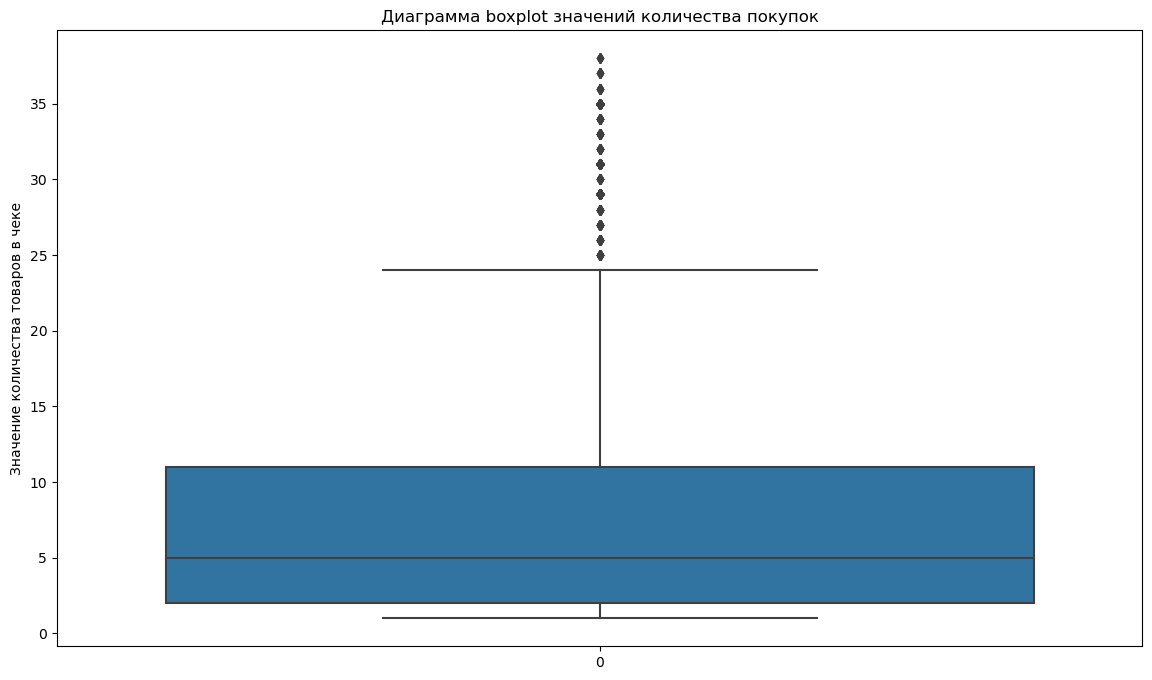

In [39]:
# Повтороно используем график 'boxplot' из библиотеки 'seaborn':
plt.figure(figsize=(14, 8))
sns.boxplot(data=data['quantity'])
plt.title('Диаграмма boxplot значений количества покупок')
plt.ylabel('Значение количества товаров в чеке')
plt.show()

Таким образом на диаграмме boxplot лучше стало видно основную массу значений, медиану и часть выбросов, которые оказались выше третьего квартиля.\
Из диаграммы видно, что основная масса покупателей оформляют от 2-х до 11-ти товаров. И только 35% всех покупателей оформляет от 12-ти до 38-ми единиц товаров.

### Добавление значений месяца формирования чека

Для упрощения дальнейшей работы по фильтрации данных создадим столбец с месяцем формирования чека purchase_month

In [40]:
# Используем метод 'DatetimeIndex' из библиотеки 'pandas', к столбцу 'purchasedate' с аргументом 'month'.
# Полученные значения запишем в новый столбец 'purchase_month'
data['purchase_month']=pd.DatetimeIndex(data['purchasedate']).month
# Выведем первые 10 строк датасета.
data.head(10)

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,price_per_one,purchase_month
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,1.63,12
2,540418,21873,1,2017-01-07 11:04:00,not_reg,Shop 0,0,1.63,1
3,541516,21873,2,2017-01-18 17:34:00,not_reg,Shop 0,0,1.63,1
4,541566,21873,35,2017-01-19 11:50:00,23401.0,Shop 0,1,1.63,1
5,538843,21873,1,2016-12-14 13:18:00,21712.0,Shop 0,0,1.63,12
6,540838,21873,11,2017-01-11 15:13:00,19541.0,Shop 0,0,1.63,1
7,543592,21873,5,2017-02-10 11:57:00,22922.0,Shop 0,1,1.63,2
10,540480,21873,11,2017-01-07 15:27:00,18159.0,Shop 4,0,1.63,1
17,539252,21873,35,2016-12-16 14:17:00,23423.0,Shop 0,1,1.63,12
18,543984,21873,11,2017-02-15 09:35:00,21280.0,Shop 0,0,1.63,2


При осмотре полученных данных видим новый столбец purchase_month в котором выделены значения месяца совершения покупки.

### Расчет суммы покупки

Для расчета стоимости покупки добавим столбец purchase_amount. Для этого, перемножим значения количества товара *quantity* с ценой, по полученному прайсу *price_per_one*

In [41]:
# Создаем колонку 'purchase_amount', в которую попадет произведение 'quantity' и 'price_per_one':
data['purchase_amount'] = data['quantity'] * data['price_per_one']
# Выведем первые 10 строк методом 'head'
data.head(10)

,purchaseid,item_id,quantity,purchasedate,customerid,shopid,loyalty_program,price_per_one,purchase_month,purchase_amount
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0,1.63,12,17.93
2,540418,21873,1,2017-01-07 11:04:00,not_reg,Shop 0,0,1.63,1,1.63
3,541516,21873,2,2017-01-18 17:34:00,not_reg,Shop 0,0,1.63,1,3.26
4,541566,21873,35,2017-01-19 11:50:00,23401.0,Shop 0,1,1.63,1,57.05
5,538843,21873,1,2016-12-14 13:18:00,21712.0,Shop 0,0,1.63,12,1.63
6,540838,21873,11,2017-01-11 15:13:00,19541.0,Shop 0,0,1.63,1,17.93
7,543592,21873,5,2017-02-10 11:57:00,22922.0,Shop 0,1,1.63,2,8.15
10,540480,21873,11,2017-01-07 15:27:00,18159.0,Shop 4,0,1.63,1,17.93
17,539252,21873,35,2016-12-16 14:17:00,23423.0,Shop 0,1,1.63,12,57.05
18,543984,21873,11,2017-02-15 09:35:00,21280.0,Shop 0,0,1.63,2,17.93


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66357 entries, 0 to 104300
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchaseid       66357 non-null  object        
 1   item_id          66357 non-null  object        
 2   quantity         66357 non-null  int64         
 3   purchasedate     66357 non-null  datetime64[ns]
 4   customerid       66357 non-null  object        
 5   shopid           66357 non-null  object        
 6   loyalty_program  66357 non-null  int64         
 7   price_per_one    66357 non-null  float64       
 8   purchase_month   66357 non-null  int64         
 9   purchase_amount  66357 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.6+ MB


### Выводы по разделу

На начальном этапе были подключены необходимые библиотеки по обработке данных и построению графиков.\
После чего в переменные retail_dataset и product_codes были загружены полученные данные выгрузок в формате csv.\
Проведена работа по обзору данных и получение первых сведений о их составе, формате и качеству.\
Далее в работе были перемены инструменты и методы позволившие привести наименование строк и столбцов к форме хорошего тона.
Также датасет product_codes был очищен от дубликатов и заменены значения цен на расценки, рассчитанные по медиане.\
После чего датасеты был объединены в единый информационный датафрейм data.\
В дальнейшем, данные были очищены от дубликатов, заполнены пропуски, усечены аномальные выбросы.\
И в заключении добавлены данные по месяцу формирования чека, а также суммы покупки.

По итогу проделанной работы из 105335 строк первоначальных данных были получены 66357 строк без дубликатов, пропусков и ошибочных данных. Потери данных составили 37.02%, это весьма существенно. Основная потеря данных произошла на этапе очистки датасета от ошибочного значения количества товаров, которое было равно нулю.\
Несмотря на это, решение об очисте от ошибочных данных позволит более качественно сделать анализ и оценить результаты.


##  Исследовательский анализ данных

###  Обзор периода исследования

Обзор периода исследования проведем методом построения гистограммы всего временного отрезка, из чего можно будет увидеть равномерность данных и наличие или отсутствие в них пробелов.

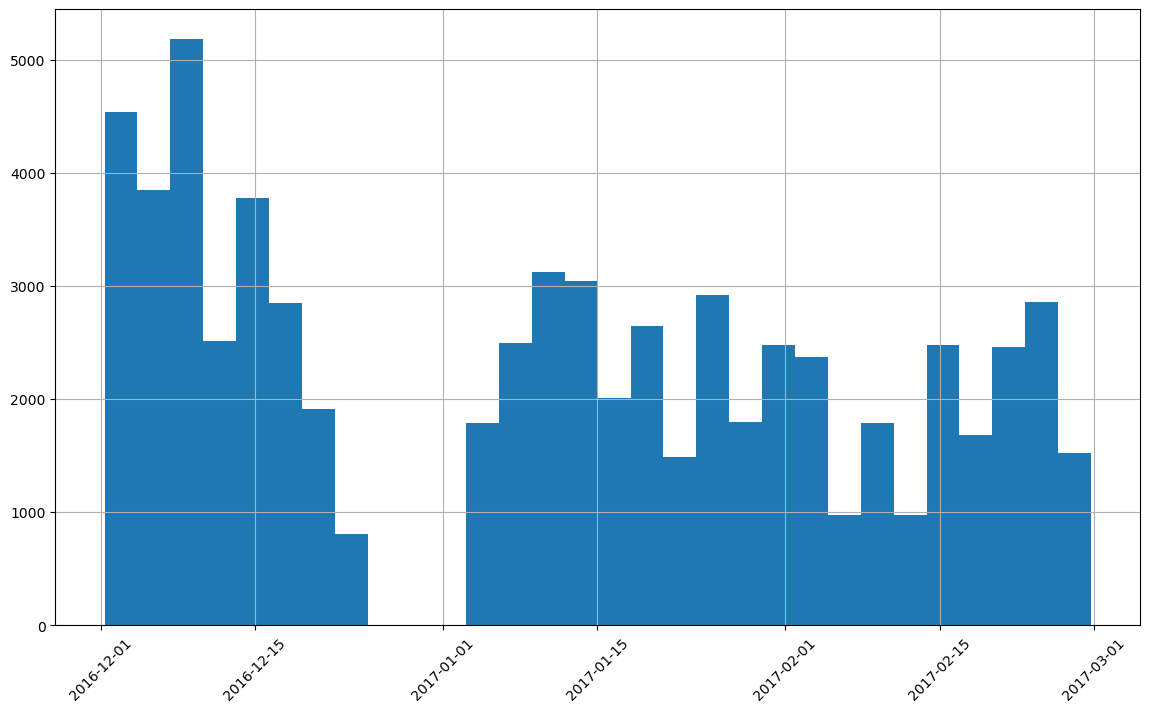

In [43]:
# Ипользуем тип графика 'hist' с параметром количества корзин равноым 30.
# Дополнительно из библиотеки 'matplotlib.pyplot' возьмем настройки размера выводимого графика 'figure' с аргументом 
# 'figsize' в котором зададим значения 14х8. Текст повернем на 45° методом 'xticks' с аргументом 'rotation',
# в которое передадим нужное значение:

plt.figure(figsize=(14, 8))
data['purchasedate'].hist(bins=30)
plt.xticks(rotation=45)
plt.show();

Выведем начальные и конечные даты исследуемого периода.

In [44]:
# Используем 'f-строки' для вывода значений, передав в них вычисляемые поля 'purchasedate.min' и 'purchasedate.max'
print(f' Минимальная дата данных: {data.purchasedate.min()}')
print(f' Максимальная дата данных: {data.purchasedate.max()}')

 Минимальная дата данных: 2016-12-01 08:26:00
 Максимальная дата данных: 2017-02-28 17:01:00


Таким образом обозреваемый период находится в пределах с 2016-12-01 08:26:00 по 2017-02-28 17:01:00

Также на графике замечен пробел данных в период с 23.12.2016 по 04.01.2017. Проверим наличие данных за этот период.\
Для этого сделаем срез обследуемого периода и выведем информацию о наличии данных в нем.

In [45]:
# Используем срез методом 'query' с логически отбором по иследуемым датам, после чего,
# выведем информацию методом 'info' по полученному срезу
data.query('purchasedate > "2016-12-24 00:00:00" and purchasedate < "2017-1-4 00:00:00"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   purchaseid       0 non-null      object        
 1   item_id          0 non-null      object        
 2   quantity         0 non-null      int64         
 3   purchasedate     0 non-null      datetime64[ns]
 4   customerid       0 non-null      object        
 5   shopid           0 non-null      object        
 6   loyalty_program  0 non-null      int64         
 7   price_per_one    0 non-null      float64       
 8   purchase_month   0 non-null      int64         
 9   purchase_amount  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 0.0+ bytes


В полученном срезе действительно нет данных. Возможно, был сбой системы регистрации продаж, но также возможно предприятие в предновогодний и новогодний период просто прекратило продажи по хозяйственным причинам. Данное обстоятельство требует уточнения у заказчика, с целью выяснения причин, а возможно и недопущения основы возникновения пробелов в данных.

### Обзор уникальных значений магазинов

С целью изучения информации о магазинах, которые осуществляют продажи, сделаем обзор их перечня.

In [46]:
# В метод 'print' передадим выборку уникальных значений столбца 'shopid' с методом 'unique':
print ('Список уникальных магазинов: ''{}'.format(data['shopid'].unique()))

Список уникальных магазинов: ['Shop 0' 'Shop 4' 'Shop 5' 'Shop 15' 'Shop 2' 'Shop 10' 'Shop 8' 'Shop 9'
 'Shop 6' 'Shop 28' 'Shop 12' 'Shop 22' 'Shop 1' 'Shop 11' 'Shop 19'
 'Shop 18' 'Shop 7' 'Shop 27' 'Shop 3' 'Shop 13' 'Shop 26' 'Shop 17'
 'Shop 16' 'Shop 14' 'Shop 24' 'Shop 20' 'Shop 25' 'Shop 30' 'Shop 21'
 'Shop 29']


In [47]:
# Вывод количества уникальных значений 'shopid' сделаем используя сочетания методов 'format' и 'nunique'
print ('Всего в дадасете уникальных магазинов: ''{}'.format(data['shopid'].nunique()))

Всего в дадасете уникальных магазинов: 30


Построим график по суммам продаж каждого магазина.

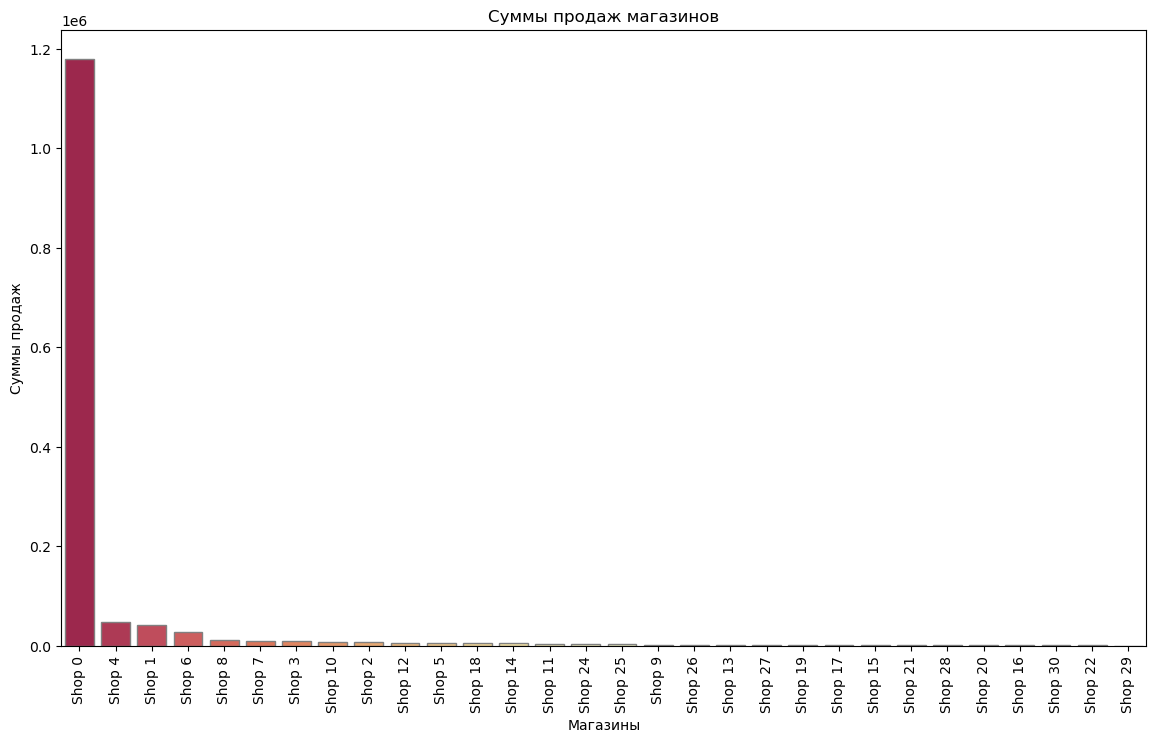

In [48]:
# Используем метод группировки данных 'groupby' к датасету 'data'. Группировку проведем по столбцу 'shopid',
# а метод sum  применим к данным из столбца 'purchase_amount'. После чего используем группировку 'sort_values'
# по сгруппированным данным с аргументом 'by='purchase_amount' и сортировкой по возрастанию 'ascending=False'
# Полученную сгруппированную таблицу запишем в переменную 'store_sales_amounts'
store_sales_amounts = data.groupby('shopid', as_index=False)['purchase_amount']\
    .sum().sort_values(by='purchase_amount', ascending=False)

# Полученные сгруппированные данные из переменной 'store_sales_amounts' выведем в виде столбчатой дираграммы 'barplot' из
# библиотеки 'seaborn', где по "y" задаются занчения purchase_amount, а по оси "х" задаются значения 'shopid'.
plt.figure(figsize=(14, 8))
ax=sns.barplot(y='purchase_amount', x="shopid",  data=store_sales_amounts, palette='Spectral', ec="gray")

# Напришем заголовок графика методом 'title'. Ось х полпишем методом 'xlabel', а y методом 'ylabel'. 
# Подписи значений оси х зададим методом 'xticks' с агрументом 'rotation=90'
plt.title('Суммы продаж магазинов')
plt.xlabel('Магазины')
plt.ylabel('Суммы продаж')
plt.xticks(rotation=90)
plt.show()


Из графика видно что в основные продажи идут через магазин "shop 0". Это говорит о наличии не диверсифицированных каналах реализации, на что стоит обратить внимание.

###  Обзор уникальных значений программ лояльности

Для дальнейшего изучения имеющейся информации необходимо сделать обзор о количестве уникальных программ лояльности в обозреваемом периоде.

In [49]:
# В метод 'print' добавим функцию 'format', в которую в свою очередь, с  помощью функции 'unique'
# проверим столбец 'loyalty_program' на наличие уникальных данных.
print('Зарегистрированные уникальные программы лояльности: ' '{}'.format(data.loyalty_program.unique()))

Зарегистрированные уникальные программы лояльности: [0 1]


В датасете есть только две программы, причем они закодированы цифровыми значениями. По полученной информации от заказчика, 0 обозначен признак не участие в программе лояльности покупателем, а 1 это участие в в ней покупателем.

### Количество покупателей в разрезе категорий по признаку участия в программе лояльности

Для дальнейшего исследования произведем подсчет покупателей, которые принимают и не принимают участия в программе лояльности.

In [50]:
# Делаем срез данных методом 'query', которому передаем логическое выражение столбца 'loyalty_program' соответствующее 0.
# После чего применим метод 'nunique' к столбцу 'customerid', которое позволит подсчитать 
# уникальные значения из полученного среза
# Одновременно сделаем вывод полученного подсчета функцией 'print':
print('Количество уникальных пользователей не принимающих участие в программе лояльности: ''{}'\
      .format(data.query('loyalty_program == 0')['customerid'].nunique()))
# Тем же методом полсчитаем количество уникальных польщователей, но уже по срезу где 'loyalty_program' будет 
# соответствовать 1
print('Количество уникальных пользователей принимающих участие в программе лояльности: ''{}'\
      .format(data.query('loyalty_program == 1')['customerid'].nunique()))

Количество уникальных пользователей не принимающих участие в программе лояльности: 1070
Количество уникальных пользователей принимающих участие в программе лояльности: 544


Из полученного подсчета видно, что количество пользователей, которые не принимают участие в программе лояльности в 1,96 раза больше, чем покупателей, которые используют эту программу и составляет 33,7% от всего количества.

#### Проверим количество уникальных пользователей совершавших покупки в разрезе каждого месяца по группам лояльности:

In [51]:
# Сформируем сводные данные методом 'pivot_table', где индексами будт уникальные значения 'loyalty_program',
# а подсчёт произведем агрегирующей функцией 'aggfunc', которой передадим метод 'nunique',
# по данным из столбца 'customerid'. В завершении подведем итоги методом 'margins'
# и переименуем полученные столбец и строки методом margins_name в 'sum'
data.pivot_table(index='loyalty_program', columns='purchase_month', values='customerid'
                 , aggfunc='nunique', margins= True , margins_name='sum')[[12, 1, 2, 'sum']]

purchase_month,12,1,2,sum
loyalty_program,,,,
0,539,488,471,1070
1,311,222,245,544
sum,850,710,716,1614


Как видно из данных, у когорты не принимающих участие в программе лояльности, от месяца к месяцу количество покупателей снижается. Так в январе количество покупателей снизилось на 51, по отношению к декабрю. В феврале убытие составлю еще 17 пользователей. Суммарно за период магазин по данной когорте потерял 68 пользователей, что составляет 4% от всего количества пользователей обеих когорт.

В когорте покупателей, принимающих участие в программе лояльности, убыток пользователей в январе составил 89 ед. по отношению к декабрю. В феврале прирост в 23 покупателя по отношению к январю. Общие потери составили 66 пользователей за период, что составляет те же 4% от общего количества покупателей.


#### Проверим, сколько чеков оформила каждая когорта пользователей за каждый месяц обозреваемого периода:

In [52]:
# Сформируем сводные данные темже методом, как и по пользователям в предыдущей строке, только данные для подсчета 
# берем из 'purchaseid'
data.pivot_table(index='loyalty_program', columns='purchase_month', values='purchaseid'
                 , aggfunc='nunique', margins= True , margins_name='sum')[[12, 1, 2, 'sum']]

purchase_month,12,1,2,sum
loyalty_program,,,,
0,971,745,703,2419
1,480,274,308,1062
sum,1451,1019,1011,3481


Из полученных агрегированных данных видно, что количество уникальных чеков внутри каждого месяца в когорте не принимающих участия в программе лояльности, постепенно снижается с декабря по февраль. Снижение в январе составило 226 чека (по отношению к декабрю), в феврале 42 чека (по отношению к январю). Общий уровень снижения за рассматриваемый период составил 268 чека.
Тренд на уменьшения количества чеков присущ и когорте покупателей, которые приняли участие в программе лояльности. В декабре потери составили 206 чеков, в феврале небольшой прирост на 34 чека, но при этом общий уровень потерь составил 172 единицы чеков за период.\
Суммарно магазин в январе теряет 432 чеков и 8 в феврале. Суммарные потери магазина в количестве чеков составило 440 единицы. Это 30% потерь от декабрьской базы.\
Интересным было бы посмотреть посетителей, не принимающих участие в программе лояльности, которые не регистрировались в магазине.


In [53]:
# Сделаем срез методом 'query' с логическим значением 'customerid' соотвествующим 'not_reg', а затем, по полученным данным
# сформируем сводную таблицу, также как и в редыдущем шаге.
data.query('customerid == "not_reg"').pivot_table(index='loyalty_program', columns='purchase_month', values='purchaseid'
                                                  , aggfunc='nunique', margins= True , margins_name='sum')\
                                                    [[12, 1, 2, 'sum']]

purchase_month,12,1,2,sum
loyalty_program,,,,
0,154,103,95,352
sum,154,103,95,352


В данном срезе также присутствует тренд на уменьшение количества чеков. Причем, незарегистрированные пользователи осуществляют покупки в 10% от всего объёма, что немало и эта категория требует дополнительного внимания.

Однако, сам по себе показатель количество чеков не совсем информативен. Ведь чеков может быть мало, а сумма покупки в них огромная. Важно посмотреть на финансовую составлявшую в рассматриваемом периоде по когортам.


### Обзор суммы покупок в разрезе категорий покупателей по признаку участия в программе лояльности

Потери в количестве чеков еще не означают финансовые потери. Суммы продаж являются более критичным показателем. Агрегируем данные по этому показателю.

In [54]:
# Используем сводные данные методом 'pivot_table' с индексами из уникальных значений 'loyalty_program', 
# а значения берем из столбца 'purchase_amount', к которому применим аггрегирующую функцию 'aggfunc' с аргумегтом 'sum'.
# И в заключении подведем итоги методом 'margins'
data.pivot_table(index='loyalty_program', columns='purchase_month', values='purchase_amount'
                 , aggfunc='sum', margins= True , margins_name='sum')[[12, 1, 2, 'sum']]

purchase_month,12,1,2,sum
loyalty_program,,,,
0,417020.265,355444.755,271507.275,1043972.295
1,139010.385,96479.795,109614.795,345104.975
sum,556030.650,451924.550,381122.070,1389077.270


Из данного обзора можно сделать следующие выводы

    По когорте покупателей, не принимающих участия в программе лояльности:
    1. Сумма продаж в январе, по сравнению с декабрем, снизилась на -61575.51 руб., что составило 15% от базы декабря.
    2. Сумма продаж в феврале существенно упала на -83937.48 руб. к январю, что составило уже -24% падения.
    3. В общей структуре продаж по итогам исследуемого периода, объем покупок данными пользователями составила 75%.

    По когорте покупателей, участвующих в программе лояльности:
    1. Падение продаж в январе, по отношению к базовому декабрю на -42530.59 руб. в абсолюте, и -31% в относительном выражении.
    2. Не большой прирост продаж в феврале на +13135.00 руб., что составило +14% к базе января.
    3. В общей структуре продаж по итогам исследуемого периода, объем покупок данными пользователями составила 25%.

    Итоговые показатели:
    1. Падение общих продаж в январе, по отношению к базе декабря, составили -104106.10 руб. Потери составили -19%.
    2. Усугубление падения суммы продаж в феврале по отношению к базе января -70820.48 руб, что составило еще -16%.
Общий намечающийся тренд не оптимистичен. В поисках точки роста, стоит обратить внимание на количество реализуемого товара.

### Количество товаров в покупках каждой из категории покупателей

Обратим внимание на объемы продаж в количественном выражении. Возможно здесь можно найти оптимистичные точки роста.

In [55]:
# Используем теже методы формироваия сводных данных, как и в педыдущих расчетах.
# Только значенме для анализа выберем столбец 'quantity'
data.pivot_table(index='loyalty_program', columns='purchase_month', values='quantity'
                 , aggfunc='sum', margins= True , margins_name='sum')[[12, 1, 2, 'sum']]

purchase_month,12,1,2,sum
loyalty_program,,,,
0,130902,123077,92327,346306
1,42353,34118,39371,115842
sum,173255,157195,131698,462148


Из данного обзора можно сделать следующие выводы

    По когорте покупателей, не принимающих участия в программе лояльности:
    1. Объем продаж в январе, относительно базы декабря, падают в абсолюте на -7825 ед. товара, что составляет -6% от базы декабря.
    2. Падение объемов продаж в этой группе, продолжается в феврале на -30750 ед. товара, что составляет -25% к базе января
    3. В общей структуре объемов продаж данная категория покупателей приобрела 75% всего товарооборота в магазинах.

    По когорте покупателей, участвующих в программе лояльности:
    1. Объем продаж в январе, относительно базы декабря, падают в абсолюте на -8235 ед. товара, что составляет -19% в категории
    2. Не значительный прирост объемов продаж +5253 ед. товара отиграло падение января на +15%
    3. В общей структуре объемов продаж данная категория покупателей приобрела 25% всего товара в магазинах. 

    Итоговые показатели:
    1. Падение общих продаж в январе, по отношению к базе декабря, составили -16060 ед. товара. Потери составили -9%.
    2. Рецессия объемов продаж продолжилась в феврале и составила к базе января -25497 ед. товара, что составило еще -16%.


### Рейтинг популярности товаров по каждой категории покупателей

Проверим общий топ-10 популярных товаров за весь период по обеим категориям покупателей

In [56]:
# Используем те же методы формирования сводных данных, что и в предыдущих шагах.
# В качестве индекса сводной таблицы возьмем 'item_id', значения для подсчета берем из столбца 'quantity'
# Полученные данные запишем в переменную 'top10_product'
top10_product=data.pivot_table(index='item_id',columns='purchase_month', values='quantity', aggfunc='sum')

# Просуммируем количество проданного товара за каждый месяц методом 'sum' с аргументом 'axis=1'
top10_product['sum']=top10_product.sum(axis=1)
top10_product=top10_product[[12, 1, 2, 'sum']]

# Произведем сортировку полученных данных от большего к меньшему по столбцу 'sum' с аргументом 'ascending=False'/
# И выведем 10 первых значений методом head c аргументом 10
top10_product.sort_values(by='sum', ascending=False).head(10)

purchase_month,12,1,2,sum
item_id,,,,
85123A,1915.0,1585.0,1138.0,4638.0
21212,903.0,932.0,1191.0,3026.0
22961,1224.0,706.0,722.0,2652.0
84879,1001.0,707.0,873.0,2581.0
85099B,693.0,693.0,902.0,2288.0
22469,786.0,698.0,772.0,2256.0
22197,1228.0,502.0,503.0,2233.0
22423,872.0,651.0,525.0,2048.0
22969,842.0,605.0,575.0,2022.0


Подготовим Топ-10 товаров покупателей не участвующих в программе лояльности:

In [57]:
# Для формирования данных сначала сделаем логический срез методом 'query' в котором сделаем отбор по 'loyalty_program == 0'
# И данные запишем в переменную 'top10_product_lp0'
# Остальные действия будут как в предыдущем шаге
top10_product_lp0 = data.query('loyalty_program == 0')\
    .pivot_table(index='item_id',columns='purchase_month', values='quantity', aggfunc='sum')[[12, 1, 2]]
top10_product_lp0['sum']=top10_product_lp0.sum(axis=1)
top10_product_lp0.sort_values(by='sum', ascending=False).head(10)

purchase_month,12,1,2,sum
item_id,,,,
85123A,1289.0,1184.0,779.0,3252.0
21212,802.0,796.0,888.0,2486.0
22961,905.0,529.0,575.0,2009.0
84879,691.0,481.0,595.0,1767.0
22197,1023.0,348.0,332.0,1703.0
85099B,548.0,538.0,606.0,1692.0
22469,593.0,507.0,558.0,1658.0
22423,671.0,580.0,367.0,1618.0
22969,607.0,380.0,395.0,1382.0


Выбор ТОП-10 товаров покупателей, не принимающих участия в программе лояльности, в значительной части совпал с общим рейтингом ТОП-10 обеих когорт.

Топ-10 товаров покупателей участвующих в программе лояльности:

In [58]:
# Используем туже конструкцию, как в предыдущем шаге, но 'loyalty_program' поставим соответствие 1
# И данные запишем в переменную 'top10_product_lp1':
top10_product_lp1 = data.query('loyalty_program == 1')\
    .pivot_table(index='item_id',columns='purchase_month', values='quantity', aggfunc='sum')[[12, 1, 2]]
top10_product_lp1['sum']=top10_product_lp1.sum(axis=1)
top10_product_lp1.sort_values(by='sum', ascending=False).head(10)

purchase_month,12,1,2,sum
item_id,,,,
85123A,626.0,401.0,359.0,1386.0
84879,310.0,226.0,278.0,814.0
22961,319.0,177.0,147.0,643.0
22969,235.0,225.0,180.0,640.0
79321,276.0,212.0,117.0,605.0
21985,17.0,424.0,161.0,602.0
22469,193.0,191.0,214.0,598.0
85099B,145.0,155.0,296.0,596.0
22492,149.0,140.0,280.0,569.0


Не все предпочтения товаров, покупаемых пользователями программы лояльности, совпадают с покупателями, не принявших участие в этой программе. 

### Выводы по разделу

Исследовательский анализ данных показал следующие результаты:
1.	Обозреваемый период составляет с 01.12.2016 08:26:00 по 28.02.2017 17:04:00 В которм обнаружен пробел данных в период с 23.12.2016 по 04.01.2017
2.	В обзоре учувствует 30 магазинов сети, из которых один shop 0 наиболее популярен
3.	Всего действует одна программа лояльности, которая кодируется в столбце loyalty_program значением 1. Значение 0 означает, что покупатель не принимает участие в программе лояльности
4.	Количество пользователей не участвующих в программе 1070 пользователей. Количество пользователей из программы лояльности составляет 544.
5.  Количество покупателей снижается в январе по обеим когортам и суммарно составляет -140 пользователей. В феврале количество покупателей в когорте участников программы лояльности дало небольшой прирост в 4%, что несущественно  компенсировало потери января и февраля по когорте нелояльных пользователей. Суммарно потери по обеим когортам за обозреваемый период составило 134 покупателя, что составляет 8% от всей численности.
6.	Количество чеков каждый месяц становится меньше. Общие потери составили 440 еденицы. Однако в феврале был небольшой прирост в когорте лояльных пользователей +34, что последствии положительно повлияло на финансовые показатели в данной группе. Причины локального роста необходимо дополнительно изучить, для возможного примера точки роста продаж.
7.	Суммы продаж от месяца к месяцу также снижаются, что должно насторожить руководство магазина. Потери в выручке составили -174908.58 руб. к базе декабря, накопительным способом. Также как и с количеством прироста пользователей с картами лояльности, в феврале был небольшой рост выручки. Это также необходимо включать в анализ причин.
8.	Количество реализованного товара также снижается от месяца к месяцу и суммарно составили -41557 ед. товара, по отношению к базе декабря. Также в группе лояльных клиентов был локальный прирост в феврале, который коррелирует с приростом покупателей в этом месяце.
9.	Топ-10 товаров, покупаемых обеими когортами покупателей, почти не совпадают друг с другом.


Т.о. можно сделать предварительные выводы о том, что магазин теряет в пользователях, в выручке и объемах продаж. Однако есть локальный положительный пример в феврале в группе покупателей с картами лояльности, который необходимо изучить, с целью повышения продаж сети магазинов. Также необходимо изучить практику продаж магазина shop 0 который в сотни раз продает больше остальных магазинов сети.


## Работа с метриками и бизнес-показателями

###  Расчёт среднего чека покупателей в разрезе категорий по признаку участия в программе лояльности

Для расчета среднего чека агрегируем данные по продажам в переменную аverage_check, из data.

In [59]:
# Используем метод группировки данных 'groupby', в котором группировку произведем по 'loyalty_program', 'purchase_month',
# 'purchaseid'  просуммируем продажи 'purchase_amount' методом 'agg' с аргументом 'sum'
аverage_check=data.groupby(['loyalty_program', 'purchase_month', 'purchaseid'], as_index=False)['purchase_amount']\
    .agg({'sum'})

# Создадим сводную таблицу методом 'pivot_table', с индексом 'loyalty_program', столбцами месяцев 'purchase_month' и 
# применим агрегирующую функцию 'agg' с аргументом 'sum'
аverage_check=round(аverage_check.pivot_table(
    index='loyalty_program', columns='purchase_month', values='sum', aggfunc='mean'),2)

# Переименуем названия месяцев в удобный вид методом 'columns'
аverage_check.columns=('январь 2017','февраль 2017','декабрь 2016')

# Изменим порядок расстановки месяцев в датасете
аverage_check=аverage_check[['декабрь 2016','январь 2017','февраль 2017']]

# Выведем результат
аverage_check

,декабрь 2016,январь 2017,февраль 2017
loyalty_program,,,
0,429.48,477.11,386.21
1,289.60,352.12,355.89


Выведем диаграмму средних чеков по сгруппированным данным в аverage_check

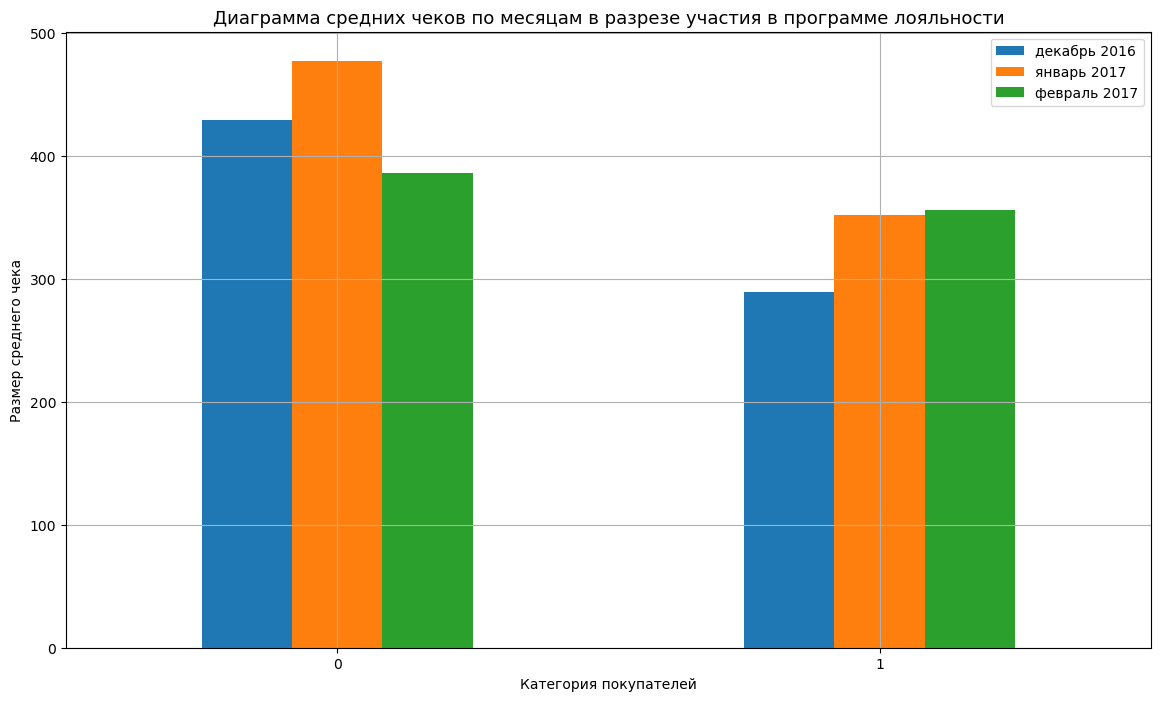

In [60]:
# Используем метод 'plot' библиотеки 'Pandas', в котом зададим аргумент 'kind=bar', зададим параметр наличия сетки
# на поле диаграммы 'grid=True', параметр размера диаграммы установим figsize=(14, 8) 
# и добавим наличие легенды 'legend = True'
аverage_check.plot(kind='bar', grid=True, figsize=(14, 8), legend = True,)

# Добавим подпись заголовка диаграммы
plt.title ('Диаграмма средних чеков по месяцам в разрезе участия в программе лояльности', fontsize=13)

# Подпишем ось Х
plt.xlabel('Категория покупателей')

# Подпишем ось Y
plt.ylabel('Размер среднего чека')

# Установим поворот подписи значений оси Х
plt.xticks(rotation=0)

# Выведем получившийся результат на экран
plt.show();

Как видно из результатов агрегации и графика, уровень среднего чека у покупателей программы лояльности на протяжении трех месяцев, ниже чем у покупателей еще не вступивших в нее. Возможно здесь сказывается короткий тестовый период и на более длительном временном лаге картина поменяется, но за прошедшие месяцы внедрения программы, результаты такие, как есть.

    Результаты среднего чека покупателей без карты лояльности:
    1. Примечательно, что средний чек декабря уступает по уровню, такому же показателю января на 11%, что скорее всего объяснимо новогодними каникулами, выплатами премий и наличия свободного времени у розничного покупателя.
    2. Снижение уровня февраля по отношению к январю на 19%, а также по отношению к декабрю на 10%, объяснимо снижением деловой активности конца предыдущего года, а также тратами розничного посетителя в январе.
        
    Результаты среднего чека покупателей с картой лояльности:
    1. После внедрения программы лояльности в декабре, заметен рост среднего чека в январе на 22%, по сравнению с декабрем. На это могли повлиять те же факторы, как в случае с покупателями без карт лояльности.
    2. В феврале небольшой рост на 1% выглядит лучше, чем спад у покупателей не участвующих в программе лояльности.



###  Расчёт среднего количества покупателей в день по признаку участия в программе лояльности

Изучим среднее количество покупателей в день в декабре 2016, январе 2017 и феврале 2017. А также сравним между собой данные по месяцам и в разрезе участия в программе лояльности.

In [61]:
# Произведем подсчет количества уникальных покупателей в каждый месяц.
# Для этого сформируем сводные данные методом 'pivot_table', где индексом будет участие
# в программе лояльности 'index=loyalty_program', месяцы будут установлены в колонках 'columns='purchase_month'',
# Значения возьмём из столбца 'values=customerid' и агрегируем с помощью 'aggfunc' и аргументом 'nunique'
mdile_visitors =  data.pivot_table(index='loyalty_program', columns='purchase_month', values='customerid', aggfunc='nunique')

# Разделим каждое значение сводных данных на количество дней в месяце.
# Для этого берем каждую колонку сводных данных, делим каждое значение на количество дней и округляем до
# двух знаков дробную часть числа методом 'round' с аргументом '2':
mdile_visitors[1] = round(mdile_visitors[1]/31, 2)
mdile_visitors[2] = round(mdile_visitors[2]/28, 2)
mdile_visitors[12] = round(mdile_visitors[12]/31, 2)

# Переименуем названия столбцов в удобный вид:
mdile_visitors.columns = ('январь 2017','февраль 2017','декабрь 2016')

# Изменим порядок расположения столбцов:
mdile_visitors = mdile_visitors[['декабрь 2016','январь 2017','февраль 2017']]

# Выведем на экран полученные данные
mdile_visitors

,декабрь 2016,январь 2017,февраль 2017
loyalty_program,,,
0,17.39,15.74,16.82
1,10.03,7.16,8.75


Далее произведём построение гистограммы по данным о среднем количестве покупателей

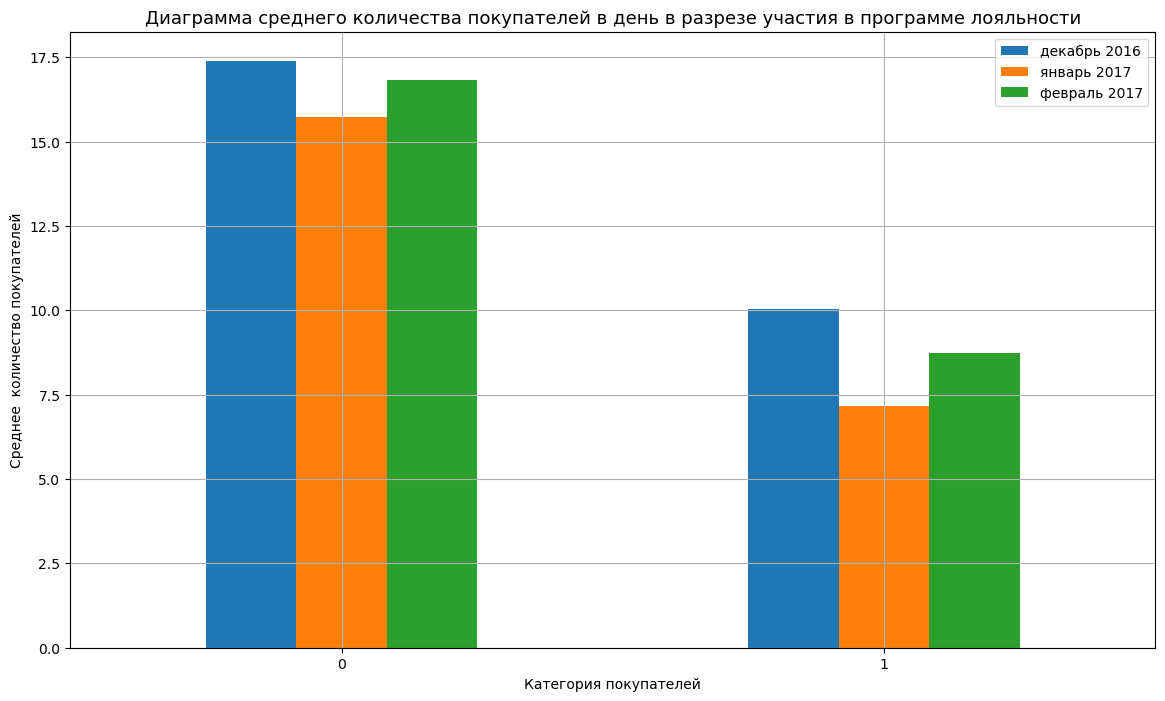

In [62]:
# Используем метод 'plot' из библиотеки 'mathplotlib' для построения графика. Аргументу 'kind' присвоим значение 'bar',
# что даст при построении графика столбчатую диаграмму. Также отрисуем сетку, задав аргументу 'grid' значение 'True'. 
# Размеры графика определим аргументом 'figsize' и добавим легенду, присвоив аргументу 'legend' значение 'True'.
mdile_visitors.plot(kind='bar', grid=True, figsize=(14, 8), legend = True,)

# Добавим подпись графику с помощью метода 'title'
plt.title ('Диаграмма среднего количества покупателей в день в разрезе участия в программе лояльности', fontsize=13)

# Подпишем ось Х методом 'xlabel'
plt.xlabel('Категория покупателей')

# Подпишем ось Y методом 'ylabel'
plt.ylabel('Среднее  количество покупателей')

# Зададим отсутствие поворота подписей оси X методом 'xticks', предав ему значение аргумента 'rotation' равным нулю
plt.xticks(rotation=0)

# Выведем график на экран методом 'show'
plt.show();

Из диаграммы среднего количества покупателей в день в разрезе участия в программе лояльности можно сделать следующие заключения:

    В группе покупателей не участвующих в программе лояльности:
    1. Общий средний уровень покупателей в день, не участвующих в программе лояльности, значительно больше
    2. В декабре 2016 в среднем покупателей в день было больше чем в остальные месяцы.
    3. В январе 2017 покупателей было меньше, что скорее всего обусловлено охлаждением спроса и покупательской способности после предновогодних трат.
    4. В феврале 2017 произошел рост среднего количества клиентов, до уровня предновогоднего декабря 2016 не дошел.

    В группе покупателей, пользующихся программой лояльности:
    1. Общий уровень среднего посещения в день, почти в два раза меньше покупателей без карт лояльности.
    2. Декабрь 2016 в данной когорте, был лучше последующих месяцев
    3. Январь 2017, также как и в противоположной когорте, оказался провальным и посетителей было существенно меньше. Причем разрыв с декабрем 2016 был существеннее, чем в группе без карт лояльности.
    4. В феврале 2017 произошел рост, но до уровня декабря не поднялся. Скорее всего это обусловлено коротким месяцем (28 дней) и еще не окрепшим спросом после новогоднего января.

В общем можно сказать, что программа лояльности еще не набрала своей популярности за короткий промежуток времени. Хотя предновогодние траты лояльных покупателей выше, чем в остальные месяцы, при наблюдении этой же категории, однако в феврале видим тренд на восстановление покупательской способности.

###  Расчёт пожизненной ценности клиента LTV в зависимости от участия в программе лояльности

Порядок расчета LTV:
1.	Получить пользовательские профили и данные о покупках. (profiles и purchases)
2.	Добавить данные о покупках в профили.
3.	Рассчитать лайфтайм пользователя для каждой покупки.
4.	Построить таблицу выручки. То есть сводную таблицу, в которой названия строк — это даты первого посещения пользователей, названия столбцов — лайфтайм, а значения в «ячейках» — выручка.
5.	Посчитать сумму с накоплением для каждой строки таблицы выручки.
6.	Вычислить размеры когорт и занести результаты в отдельную таблицу.
7.	Объединить таблицы размеров когорт и выручки.
8.	Посчитать LTV: разделить каждую «ячейку» таблицы выручки на соответствующий размер когорты.


#### Формирование профилей покупателей

Для расчета LTV необходимо сформировать профили пользователей с данными первого посещения. Результат запишем в переменную profiles

In [63]:
# Перед группировкой произведем сортировку данных по 'customerid' и 'purchasedate'. Это даст датасет в котором 
# id покупателя будет повторятся столько раз, пока не закончатся строки с его значением. Также вторая сортировка
# будет по дате, что поможет в дальнейшем вычленить первую покупку пользователя и определить его дату.
# После сортировки сгруппируем данные по 'customerid' и принадлежащих к когорте участников 'loyalty_program'
# Сгруппируем данные из data и методом first найдем первые строки с id покупателя, а  т.к . сортировка была еще и по
# 'purchasedate', то первая строка с id будет содержать первую дату совершения покупки.
# У сгруппированных данных перестроим индексы и запишем ы переменную 'profiles':
profiles = data.sort_values(by=['customerid', 'purchasedate']).groupby(['customerid', 'loyalty_program'])\
        .agg({'purchasedate': 'first'})\
        .reset_index()

# Для удобства переименуем названия столбцов в 'profiles' методом 'rename', передав аргументу 'columns' значения 
# исходного и нового наименования:
profiles = profiles.rename(columns={'customerid':'user_id', 'purchasedate': 'first_ts', 'loyalty_program':'cohort'})

# Выделим дату первого посещения в отдельный столбец, отформатировав в удобный вид:
profiles['dt'] = profiles['first_ts'].dt.date

# Определяем первый день месяца, в который произошла покупка методом 'astype' передав аргументу 'datetime64' значение 'M'
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

# Выведем первые десять строк:
profiles.head(10)

,user_id,cohort,first_ts,dt,month
0,18026.0,0,2016-12-07 14:57:00,2016-12-07,2016-12-01
1,18027.0,0,2016-12-16 19:09:00,2016-12-16,2016-12-01
2,18029.0,0,2017-02-02 16:01:00,2017-02-02,2017-02-01
3,18031.0,0,2017-02-16 12:33:00,2017-02-16,2017-02-01
4,18035.0,0,2017-01-18 09:50:00,2017-01-18,2017-01-01
5,18038.0,0,2017-01-12 12:43:00,2017-01-12,2017-01-01
6,18040.0,0,2017-02-25 13:51:00,2017-02-25,2017-02-01
7,18041.0,0,2017-02-17 10:30:00,2017-02-17,2017-02-01
8,18044.0,0,2017-02-21 13:51:00,2017-02-21,2017-02-01
9,18049.0,0,2016-12-14 12:58:00,2016-12-14,2016-12-01


#### Формирования продаж в разрезе покупателей

Также для расчёта LTV необходимо сформировать данные о покупках посетителей. Данные также возьмем из датафрейма data и запишем в переменную purchases

In [64]:
# Для начала делаем срез по покупкам 'purchase_amount', уберем данные, в которых значение было равно нулю.
# Далее проведем группировку из 'data' по id покупателя и дате покупки, а значения 'purchase_amount' посчитаем 
# агрегирующей функцией 'agg' со значением 'sum'
purchases =  data.query('purchase_amount > 0').groupby(['customerid', 'purchasedate'], as_index=False)['purchase_amount']\
    .agg('sum')

# Добавим данные с первым днем месяца совершения покупки:
#purchases['month'] = purchases['purchasedate'].astype('datetime64[M]')
purchases = purchases.rename(columns={'customerid':'user_id', 'purchasedate': 'event_dt', 'purchase_amount': 'revenue'})

# Выведем полученные данные:
purchases

,user_id,event_dt,revenue
0,18026.0,2016-12-07 14:57:00,955.350
1,18026.0,2017-01-26 14:30:00,781.170
2,18027.0,2016-12-16 19:09:00,171.900
3,18027.0,2017-01-25 10:42:00,28.865
4,18029.0,2017-02-02 16:01:00,386.180
...,...,...,...
3430,not_reg,2017-02-28 10:15:00,144.225
3431,not_reg,2017-02-28 14:19:00,197.785
3432,not_reg,2017-02-28 16:47:00,621.325
3433,not_reg,2017-02-28 16:50:00,539.410


Добавим к данным информацию о покупках карт лояльности соответствующим пользователям, для этого сформируем отельную таблицу в которую войдут id покупателей, дата совершения первой покупки и стоимость карты лояльности в размере 200 руб.\
В последствии, полученные данные присоединим к таблице purchases

In [65]:
# Используем логическую фильтрацию методом 'loc', который применим к данным 'purchases['user_id']'.
# Условием для фильтрации будет вхождение (isin) 'user_id' в список уникальных значений из среза 'profiles', 
# c использованием 'query', где 'cohort' соответствует  '1'.
# Далее полученные данные будут сгруппированы методом 'groupby' по 'user_id' и найдена первая строка всех значений.
# В заключении будет перестроен индекс таблицы 'reset_index'
loyalty_card = purchases.loc[purchases['user_id'].isin(profiles.query('cohort == 1')['user_id'].unique())]\
   .groupby('user_id').agg({'first'}).reset_index()

#Переименуем наименования колонок в 'loyalty_card', методом 'columns', где по порядку будут 
loyalty_card.columns=('user_id', 'event_dt', 'revenue')

#Создадим столбец со стоимостью карт лояльности равной 200 ру
loyalty_card['revenue']=200

In [66]:
# Выведем полученные значения
loyalty_card

,user_id,event_dt,revenue
0,22005.0,2017-01-09 12:01:00,200
1,22006.0,2016-12-05 12:43:00,200
2,22011.0,2017-02-07 14:16:00,200
3,22018.0,2017-02-28 13:41:00,200
4,22029.0,2017-01-10 09:44:00,200
...,...,...,...
539,23936.0,2017-02-16 15:13:00,200
540,23938.0,2016-12-08 13:38:00,200
541,23939.0,2016-12-16 18:23:00,200
542,23948.0,2016-12-08 13:53:00,200


In [67]:
# Объеденим два датасета с помощю медода 'concat', которая добавит в конец датасета 'purchases' покупку карты лояльности
# пользователей из 'loyalty_card'

purchases=pd.concat([purchases,loyalty_card])
purchases.sort_values(by='event_dt')

,user_id,event_dt,revenue
425,23529.0,2016-12-01 08:26:00,200.000
2869,23529.0,2016-12-01 08:26:00,186.515
2870,23529.0,2016-12-01 08:28:00,19.750
405,18726.0,2016-12-01 08:34:00,381.485
406,18726.0,2016-12-01 08:35:00,13.200
...,...,...,...
3432,not_reg,2017-02-28 16:47:00,621.325
3433,not_reg,2017-02-28 16:50:00,539.410
3434,not_reg,2017-02-28 16:59:00,479.605
2643,23141.0,2017-02-28 17:01:00,720.415


#### Формирование функции для расчтеа LTV
Для автоматизации процесса, а также экономии кода, напишем фунцию для расчета LTV, с группировкой по когортам и динамикой.

In [68]:
def get_ltv( # Шаг 1. 
    profiles,  # Получаем профили, 
    purchases, # данные о покупках,
    observation_date, # период наблюдения,
    horizon_days, # горизонт наблюдения,
    dimensions=[], # категоризацию по когортам.
    ignore_horizon=False, # устанавливаем игнорирование горизонта наблюдений в режим 'False'
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date=observation_date-timedelta(days=horizon_days - 1)
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавляем данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    # На вход функии попадет таблица 'result_raw', переменная 'dimensions' и переменная 'horizon_days':
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 4. Построим таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims, # в качестве индексов используем признак участия в программе лояльности ['cohort']
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 5. Посчитаем сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 6. Вычисляем размеры когорт
        cohort_sizes = (df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'}))

        # Шаг 7. Объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 8. Посчитаем LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу LTV с помощю функции group_by_dimensions, на вход которой подаем в строгой последовательности
    # 'result_raw', 'dimensions', 'horizon_days', а на выходе получим таблицу 'result_grouped':
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

#### Ввод начальных расчетных параметров

Для проведения расчетов с помощью созданной функции *get_ltv* зададим значения по периоду наблюдения, горизонту наблюдения и категоризации покупателей в когорты.

In [69]:
# Период наблюдения:
analysis_horizon = datetime(2017, 2, 28).date()

# Горизонт наблюдения:
horizon_days = 30

# Категоризация покупателей в когорты:
dimensions = ['cohort']

#### Получим расчетные данные LTV
Вызовем функцию расчета LTV, задав расчетные параметры

In [70]:
# Передадим функции требуемые данные в соотвествии с порядком, который в ней следуют переменные: 
# 'profiles', 'purchases', 'analysis_horizon', 'horizon_days', 'dimensions'.
# Результат работы функции запишем в соотвествующие переменные, также по порядку: 'ltv_raw', 'ltv', 'ltv_history'
ltv_raw, ltv, ltv_history = get_ltv(
    profiles, purchases, analysis_horizon, horizon_days, dimensions)

Выведем первые строки полученных данных ltv_raw, ltv, ltv_history:

In [71]:
ltv_raw.head(10)

,user_id,cohort,first_ts,dt,month,event_dt,revenue,lifetime
0,18026.0,0,2016-12-07 14:57:00,2016-12-07,2016-12-01,2016-12-07 14:57:00,955.350,0
1,18026.0,0,2016-12-07 14:57:00,2016-12-07,2016-12-01,2017-01-26 14:30:00,781.170,49
2,18027.0,0,2016-12-16 19:09:00,2016-12-16,2016-12-01,2016-12-16 19:09:00,171.900,0
3,18027.0,0,2016-12-16 19:09:00,2016-12-16,2016-12-01,2017-01-25 10:42:00,28.865,39
4,18035.0,0,2017-01-18 09:50:00,2017-01-18,2017-01-01,2017-01-18 09:50:00,2115.420,0
5,18038.0,0,2017-01-12 12:43:00,2017-01-12,2017-01-01,2017-01-12 12:43:00,439.995,0
6,18038.0,0,2017-01-12 12:43:00,2017-01-12,2017-01-01,2017-02-07 14:51:00,1477.180,26
7,18049.0,0,2016-12-14 12:58:00,2016-12-14,2016-12-01,2016-12-14 12:58:00,1426.295,0
8,18049.0,0,2016-12-14 12:58:00,2016-12-14,2016-12-01,2016-12-17 09:38:00,225.790,2
9,18056.0,0,2016-12-20 09:37:00,2016-12-20,2016-12-01,2016-12-20 09:37:00,1346.835,0


In [72]:
ltv.head(10)

,cohort_size,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
cohort,,,,,,,,,,,,,,,,,,,,,
0,813,473.159834,492.920271,494.021052,497.383868,512.039287,519.043499,547.736415,573.580363,588.776347,...,686.663143,698.346039,701.185615,704.364127,707.439139,709.522946,713.126316,719.582651,723.369317,732.906162
1,421,544.667197,561.064026,567.119952,568.413444,571.079644,581.076698,585.698183,592.634549,597.363076,...,635.483527,636.353990,636.982577,639.597601,640.327779,643.652898,644.507102,648.261152,655.677565,657.674169


In [73]:
ltv_history.head(10)

,cohort_size,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
dt,,,,,,,,,,,,,,,,,,,,,
2016-12-01,90,490.773722,691.631389,703.728000,705.968667,809.518444,863.518500,1022.756000,1126.305056,1200.062222,...,1722.861556,1781.314000,1787.791222,1787.791222,1787.791222,1787.791222,1787.791222,1787.791222,1787.791222,1787.791222
2016-12-02,86,420.534012,420.534012,420.534012,422.159884,434.416628,450.971453,453.848663,504.311395,504.311395,...,614.030756,614.030756,614.030756,614.030756,614.030756,614.030756,614.030756,614.030756,614.030756,614.030756
2016-12-03,43,456.415000,456.415000,464.363721,465.860233,465.860233,478.029186,505.787442,505.787442,515.561512,...,587.367093,587.367093,587.367093,587.367093,587.367093,587.367093,587.367093,587.367093,587.367093,587.367093
2016-12-05,68,472.379779,504.568824,507.790000,519.425221,539.935735,543.274779,576.554632,603.277721,634.387941,...,695.302059,695.302059,695.302059,695.302059,695.302059,695.302059,695.302059,695.302059,695.302059,695.302059
2016-12-06,68,422.233456,424.556250,432.212426,445.131765,446.619044,449.152353,449.152353,504.064118,539.001103,...,615.895147,615.895147,615.895147,615.895147,615.895147,615.895147,615.895147,615.895147,615.895147,664.782647
2016-12-07,45,485.714444,485.714444,491.837444,491.837444,491.837444,491.837444,530.522000,542.056889,542.056889,...,611.412000,611.412000,611.412000,611.412000,611.412000,611.412000,611.412000,611.412000,652.702333,667.708556
2016-12-08,78,485.549167,485.549167,486.094679,488.801474,497.772692,504.355769,525.567308,539.336923,548.114872,...,629.651795,629.651795,629.651795,629.651795,629.651795,629.651795,629.651795,649.518013,654.830064,666.043910
2016-12-09,64,444.635391,444.635391,444.635391,448.537109,448.741953,457.454297,457.544609,466.987344,494.326406,...,545.125859,545.125859,545.125859,545.125859,545.125859,548.380000,559.266328,576.823984,588.170078,601.382500
2016-12-10,41,583.082195,583.082195,584.589756,593.297439,602.530976,602.927073,608.849146,662.761098,662.761098,...,681.268171,681.268171,681.268171,681.268171,688.765854,691.189268,691.189268,704.303415,704.303415,704.303415


#### Построим графики LTV и динамики LTV покупателей

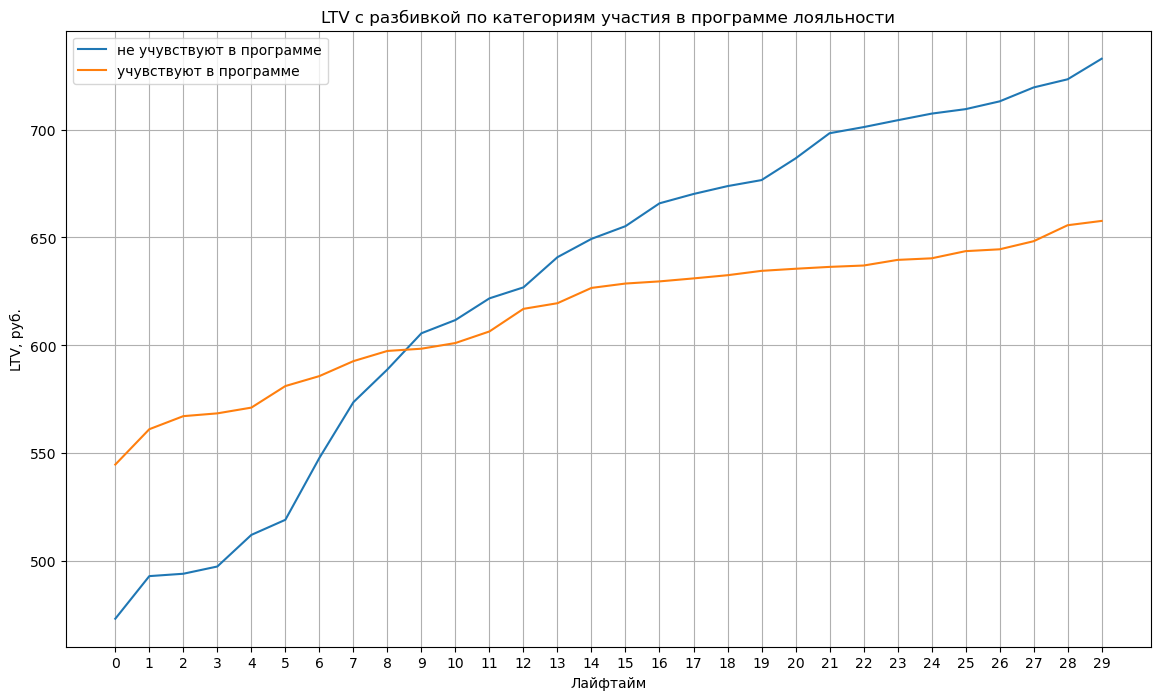

In [74]:
# Строим кривые LTV
# Для начала необходимо убрать столбец 'cohort_size' из таблицы 'ltv', т.к. этот столбец показывает размер когорт.  
report = ltv.drop(columns=['cohort_size'])

# Построим линейный график методом 'plot', предварительно трансформировав таблицу 'report' в вертикальный вид,
# указав 'T' после названия датасета. Зададим наличие сетки графика аргументом 'grid=True', размер аргументом figsize,
# Подписи оси Х для аргумента 'xticks' возьмем из списка столбцов таблицы 'report' методом ‘columns’,
# задав аргумент ‘values’:
report.T.plot(grid=True, figsize=(14, 8), xticks=list(report.columns.values))

# Подпишем наименование диаграммы:
plt.title('LTV с разбивкой по категориям участия в программе лояльности')

# Подпишем ось Y:
plt.ylabel('LTV, руб.')

# Подпишем ось X:
plt.xlabel('Лайфтайм')

# Выводим легенду на область диаграммы:
plt.legend(['не учувствуют в программе', 'учувствуют в программе'])

# Выводим график со всеми параметрами:
plt.show()

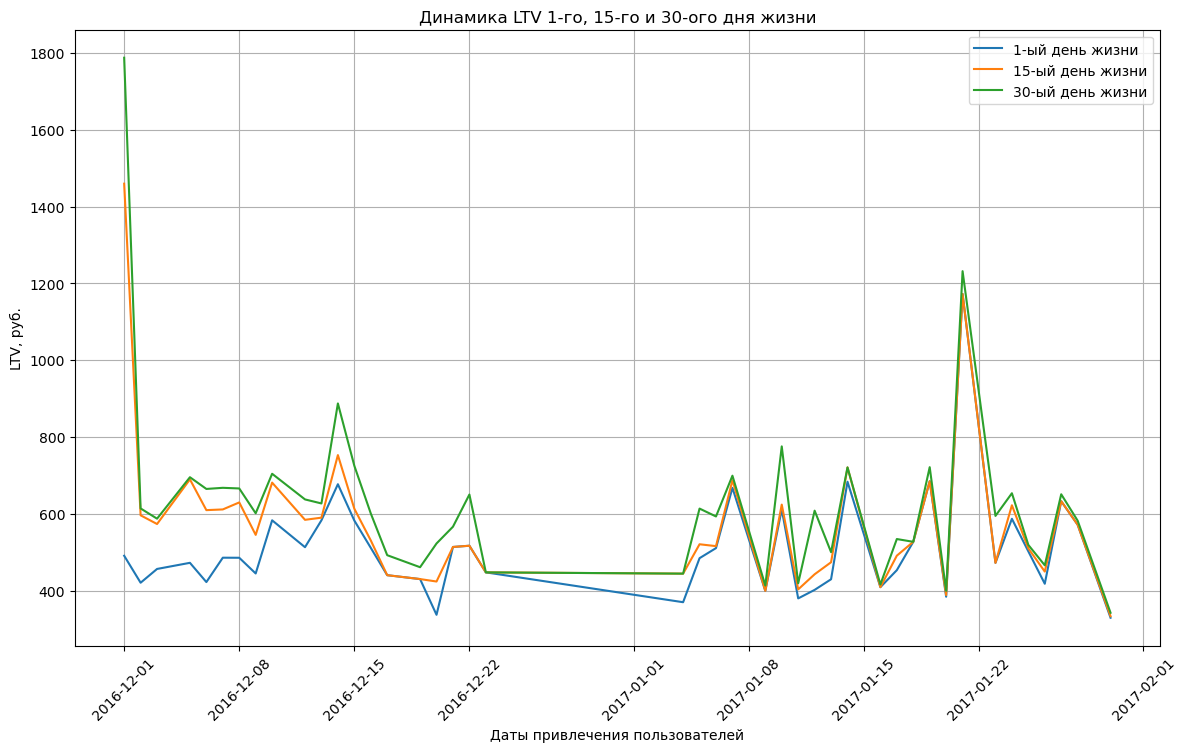

In [75]:
# Строим график истории изменений LTV
report = ltv_history[[0, 14, 29]]  # делаем срез данных на первый, четырнадцатый и тридцатый день жизни пользователя

# Используем тот же метод построения 'plot', задав параметры сетки 'grid' и размера диаграммы 'figsize'
report.plot(grid=True, figsize=(14, 8))

# Подпишем наименование диаграммы:
plt.title('Динамика LTV 1-го, 15-го и 30-ого дня жизни')

# Подпишем ось Y:
plt.ylabel('LTV, руб.')

# Подпишем ось X: 
plt.xlabel('Даты привлечения пользователей')

# Зададим наименование легенде, для более удобного просмотра:
plt.legend(['1-ый день жизни', '15-ый день жизни', '30-ый день жизни'])

# Повернем подписи оси X на 45°
plt.xticks(rotation=45)

# Выводим график со всеми параметрами:
plt.show()

### Выводы по разделу

В результате обработки данных и вычисления LTV (пожизненной ценности покупателя) в разрезе когорт участия или не участия в программе лояльности можно сделать следующие вводы:
1.	Оба коэффициента имеют правильный, нормальный рост, что говорит о корректности проведения расчетов
2.	Коэффициент LTV покупателей не из программы лояльности в первые 9 дней ниже того же показателя пользователей, принявших участие в программе лояльности. Однако на 10-ый день ситуация меняется и ценность клиентов без карт лояльности превысила конкурирующую когорту. И отрыв был недосягаем для покупателей с картами лояльности.
3. Динамика роста LTV не обладающего картой лояльности, более активна в соем росте, по сравнению с покупателями, участвующими в программе.
4. Клиенты по программе лояльности в любом случае делают положительный вклад, несмотря на отставание в динамике роста. Возможно, на более длительном этапе наблюдений LTV лояльных покупателей вновь будет больше, чем у покупателей не из программы лояльности. Но на текущий период наблюдения тренд очевиден и не оказывает поддержку в продолжении программы лояльности.

По оценке динамики LTV 1-ого, 15-ого, 30-ого дня жизни можно сделать следующие выводы:
1.	Динамика ценности клиентов привлеченных c 01.12.2016 по 14.12.2016, LTV первого дня ниже LTV 15-ого и 30-ого дня. Но в дальнейшем графики практически сливаются.
2.	В общих чертах все динамики практически идентичны, только динамика LTV первого дня ниже динамики LTV 30-ого дня. Но это различие есть только для пользователей привлеченных до 14.12.2016



## Проверка гипотез

### Гипотеза 1: Средний чек участников программы лояльности равен, среднему чеку у остальных покупателей

Т.к. мы будем сравнивать две средние генеральной совокупности, то для тестирования выберем метод U-test "Манна-Уитни", который наиболее точно подходит для данного случая, т.к. присутствуют значительные выбросы в данных. При этом, есть предположение, что условие нормальности распределения выборок и идентичности дисперсий не соблюдаются и выбор T-теста будет некорректным.
Для подтверждения варианта тестирования, проверим распределение двух совокупностей  на графике, но перед этим сформируем данные совокупности:


Подготовим выборки с соответствующими группами для тестирования mid_check_0 для покупателей не участвующих в программе лояльности и mid_check_1 для участников программы лояльности.

In [76]:
# группировка данных методом 'groupby' по признаку программы лояльности и идентификатору чека. Суммируем 'purchase_amount'
# с помощью агрегирующей функции 'agg' с аргументом 'sum'. Данные запишем в переменную ttest_mid_chek:
test_mid_chek=data.groupby(['loyalty_program', 'purchaseid'])['purchase_amount'].agg({'sum'})

# Перестроим индексы методом 'reset_index' и выведем результат:
test_mid_chek.reset_index()

,loyalty_program,purchaseid,sum
0,0,536367,285.395
1,0,536368,96.090
2,0,536369,13.200
3,0,536370,1184.660
4,0,536374,367.350
...,...,...,...
3476,1,545186,171.425
3477,1,545187,155.165
3478,1,545213,184.050
3479,1,545214,218.710


In [77]:
# Сделаем срез данных методом query по чекам покупателй не из программы лояльности 'loyalty_program == 0'
mid_check_0 = test_mid_chek.query('loyalty_program == 0')

# Сделаем срез данных методом query по чекам покупателй принимающих участие в программе лояльности 'loyalty_program == 1'
mid_check_1 = test_mid_chek.query('loyalty_program == 1')

Построим гистораммы распределения данных:

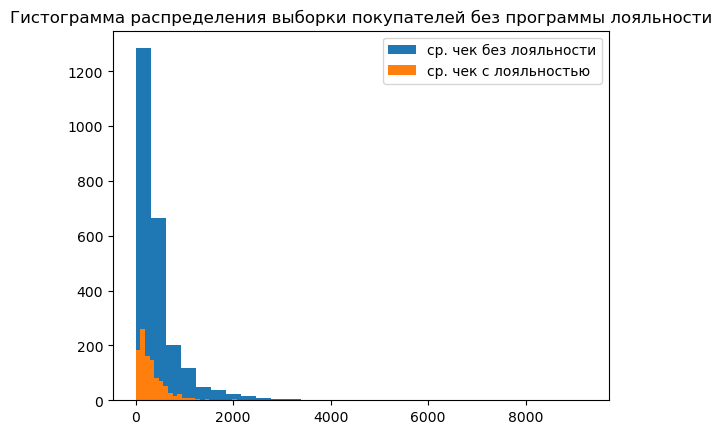

In [78]:
# CФормируем гистограмы по датасетам mid_check_0 и mid_check_1 методом 'hist', 
# зададим размер корзин 'bins=30' и выведем обе гистограммы на одном поле

plt.hist(mid_check_0, bins=30, label='ср. чек без лояльности')
plt.hist(mid_check_1, bins=30, label='ср. чек с лояльностью')
plt.legend()
plt.title('Гистограмма распределения выборки покупателей без программы лояльности')
plt.show();

При построении графиков наше предположение о распределении и дисперсии подтвердилось, что еще раз говорит о верности выбора тестирования выборок U-тестом Манна-Уитни

Проверка гипотезы: о среднем чеке покупателей магазина

```
H_0: Средний чек участников программы лояльности = среднему чеку покупателей не использующих программу лояльности
H_a: Средний чек участников программы лояльности ≠ среднему чеку покупателей не использующих программу лояльности
alpha = 0.05
```

In [79]:
# Зададим alpha, значение уровня значимости
alpha = 0.05

# вызовем метод Манна-Уитни из библиотеки scipy.stats для проверки гипотезы. 
# в параметры зададим массивы выборок 'mid_check_0' и 'mid_check_1'
stat, p = mannwhitneyu(mid_check_0, mid_check_1)

# Выведем значения полученной статистики stat и значения p-value
print('Статистика U-теста = %.3f, p-value = %.3f' % (stat, p))

# Принимаем решение о принятиии/отклонении нулевой гипотезы
if p < alpha:
    print ('Отвергаем нулевую гипотезу ')
else:
    print ('Не получилось отвергнуть нулевую гипотезу ')

Статистика U-теста = 1384858.000, p-value = 0.000
Отвергаем нулевую гипотезу 


Значение статистики равное 1384857 говорит о том, что существуют значительные различия между двумя выборками данных. Значение p равное 0.000 говорит о том, что вероятность случайного возникновения таких различий между выборками крайне мала.

### Гипотеза 2: Среднее количество купленного товара у посетителей одинаково, не зависимо от участия в программе лояльности

Т.к. мы будем сравнивать две средние генеральной совокупности, то для тестирования выберем метод U-test Манна-Уитни, т.к. предполагаем, что распределение выборок не отвечает критериям нормальности и нет однородности дисперий. Т.о. выбор T-теста будет ошибочным.
Для подтверждения варианта тестирования, проверим распределение двух совокупностей  на графике, но перред эти сформируем данные совокупости:


Сформируем два датасета, разделяющих между собой покупателей с картой лояльности и без нее.\
Первый запишем в датасет purchases_0, а второй в purchases_1

In [80]:
# Используем группировку 'groupby' по датасету 'data' который сгруппируем по параметрам 'loyalty_program' и 'customerid'
# данные о количестве товара 'quantity' агрегируем функцией 'agg' с параметром 'sum'.
# Результат запишем в переменную 'ttest_mid_quantity'
test_mid_quantity=data.groupby(['loyalty_program', 'customerid'])['quantity'].agg({'sum'})

# Обновим индексы при помощи 'reset_index'
test_mid_quantity.reset_index()

,loyalty_program,customerid,sum
0,0,18026.0,574
1,0,18027.0,120
2,0,18029.0,180
3,0,18031.0,83
4,0,18035.0,491
...,...,...,...
1609,1,23936.0,108
1610,1,23938.0,109
1611,1,23939.0,403
1612,1,23948.0,69


Подготовим два датасета purchases_0 в который войдут данные с продажами покупателям не из программы лояльности. А в purchases_1 запишем данные продаж покупателей с картами лояльности.

In [81]:
#  В обоих случаях используем метод среза 'query' и логической цепочки по столбцу 'loyalty_program' из 
# датасета 'test_mid_quantity', со значением 0 или 1, в соотвествии с участием в программе лояльности.
purchases_0=test_mid_quantity.query('loyalty_program == 0')
purchases_1=test_mid_quantity.query('loyalty_program == 1')

Теперь перейдем к построению гистограмм распределения

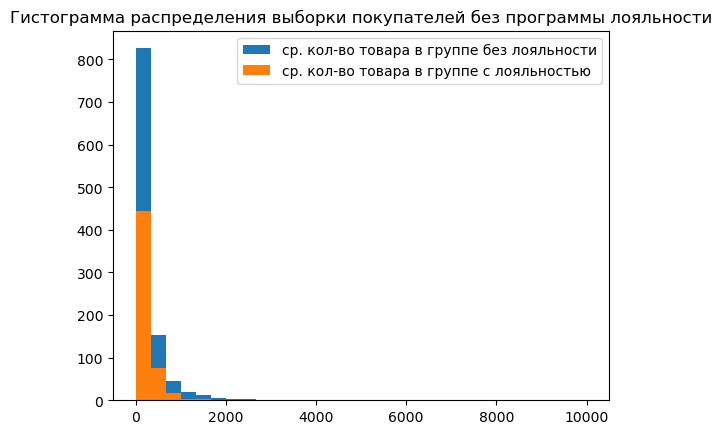

In [82]:


plt.hist(purchases_0, range=(0, 10000), bins=30, label='ср. кол-во товара в группе без лояльности')
plt.hist(purchases_1, range=(0, 10000), bins=30, label='ср. кол-во товара в группе с лояльностью')
plt.title('Гистограмма распределения выборки покупателей без программы лояльности')
plt.legend()
plt.show();

При построении графиков наше предположение о распределении и дисперсии подтвердилось, что еще раз говорит о верности выбора тестирования выборок U-тестом Манна-Уитни

Проверка гипотезы: о равенстве количества покупок участниками программы лояльности и теми кто не принимает участия в ней.

```
H_0: Среднее количество покупок участников программы лояльности = среднему количеству покупок клиентов не использующих программу лояльности
H_a: Среднее количество покупок участников программы лояльности ≠ среднему количеству покупок клиентов не использующих программу лояльности

alpha = 0.05
```


In [83]:
# Зададим alpha, значение уровня значимости
alpha = 0.05

# вызовем метода Манна-Уитни для проверки гипотезы 
stat, p = mannwhitneyu(purchases_0, purchases_1)

# Выведем значения полученной статистики stat и значения p-value
print('Статистика U-теста = %.3f, p-value = %.3f' % (stat, p))

# Принимаем решение о принятиии/отклонении нулевой гипотезы
if p < alpha:
    print ('Отвергаем нулевую гипотезу ')
else:
    print ('Не получилось отвергнуть нулевую гипотезу ')

Статистика U-теста = 302594.500, p-value = 0.192
Не получилось отвергнуть нулевую гипотезу 


Значение статистики 302594.500 говорит о том, что между двумя выборками нет значительных различий. Значение p-value равное 0.192 указывает на то, что вероятность случайного возникновения различий между выборками довольно велика.\
Т.к. p-value превышает зананный кровень значимости alpha, это может означать, что нет оснований считать различия между выборками статистически значимыми.

### Выводы по разделу

Согласно статистическому анализу средних чеков покупателей, участвующих в программе лояльности и не участвующих, гипотеза о разности средних чеков не подтвердилась. Результаты теста говорят о  реальных и не случайных различиях в выборках средних чеков обеих когорт.  Это также означает, что средний чек у двух групп разный. Данное обстоятельство должно натолкнуть на размышления об необходимости продолжения проведения наблюдений за показателем среднего чека в этих различных группах покупателей.

Что же касается количества купленного товара покупателями обеих категорий, то статистический анализ дает ответ о том, что посетители покупают одинаковое количество. По этой причине необходимо проанализировать программу лояльности на предмет мотивации покупателей с катарами лояльности, покупать больше товаров.


## Выводы и рекомендации для заказчика

В результате проведения исследовательской работы были изучены данные по продажам за период с 01.12.2016 8:26 по 28.02.2017 17:44, и определена эффективность внедренной программы лояльности.\
В процессе исследования были обработаны полученные данные, на предмет дубликатов, пропусков и аномальных значений. Все не крокетные данные были удалены из датасета. Также данные приведены к соответствующим форматам.
На данной стадии был выявлен существенный недостаток исходных данных, который может серьезно влиять на результаты исследования. Так в файле product_codes.csv выявлена регистрация уникальных товаров по различным ценам. Причем регистрация разных цен идет без привязки к дате ее формирования. Возможно разные цены формируются в результате применения скидок по программе лояльности, но однозначно утверждать это нельзя. Данный аспект требует проработки специалистов, отвечающих за сбор данных.

На этапе исследовательского анализа было выявлено:
1.	Основные продажи происходят через магазин с кодом shop 0, что говорит о необходимости развивать другие каналы продаж.
2.	В деятельности магазинов используется только одна программа лояльности, что может сужать заинтересованных покупателей с разными требованиями к таким программам, а также затрудняет поиск основных направлений привлечения клиентов.
3.	Всего зарегистрировано 1684 уникальных клиента, из которых 567 принимают участие в программе лояльности. Также обнаружена особенность присутствия большого количества продаж не зарегистрированным пользователям, из-за чего им пришлось присвоить отдельное наименование "not_reg", чтобы не потерять большой массив данных о реализациях. На это стоит обратить внимание, возможно необходимо изменить процедуру идентификации покупателей, например по id устройства.
4.	Анализ выручки среди покупателей обеих когорт снижается и составляет -108 538,95 руб., за период обзора. Это плохой тренд в части развития бизнеса, что требует дополнительного изучения и выработки мер по изменению ситуации.
5.	Анализ клиентской базы также показывает снижение, что подтверждается падением выручки. Всего за период магазин потерял 562 уникальных покупателя обеих когорт. Это также требует изучения и выработки стратегии привлечения новых покупателей, снижения оттока и возврат ранее сотрудничавших с магазином.
6.	Количество реализуемых товаров также снижается. За весь период потери составили -35723 ед. товаров. Возможно ассортимент влияет на общий тренд снижения продаж и отток клиентов. Это требует дополнительного изучения и проверок.
7.	В процессе анализа были выявлены ТОП-10 товаров, которые приобретают обе категории покупателей и они полностью совпадают друг с другом.

В процессе исследования были выбраны бизнес-метрики, которые в свою очередь подверглись дополнительному анализу.\
1.	Метрика среднего чека. По данной метрике были изучены обе категории покупателей в динамике рассматриваемого периода. В результате было выявлено, что средний чек декабря выше среднего чека января 7-10 % в зависимости от лояльности покупателей. Провал января был компенсирован ростом среднего чека в феврале, но всего лишь на 6% в обеих категориях. Возможно в марте будет сезонный рост, который позволит компенсировать просадку января. Также было обнаружено, что средние чеки в обеих категориях не сильно отличатся друг от друга. Что в дальнейшем было проверено через модель статистического наблюдения.
2.	Метрика среднего количества покупателей в день, в зависимости от лояльности.
    По данной метрике были агрегированы данные по месяцам обзора и группам лояльности (участник программы лояльности или нет). Было выявлено, что в день среднее количество посетителей не обладающих картами лояльности, больше, чем их обладателей. Отличие составляло в декабре в 1,7 раза, в январе уже в 2,2 раза, в феврале 1,9 раз. Это вполне объяснимо тем, что общее количество группы клиентов, не использующих программу лояльности больше, чем тех, кто использует. Однако, это может говорить о недостаточной привлекательности программы и клиенты неохотно на нее подписываются.
3.	Метрика пожизненной ценности LTV. Данная метрика отлично показывает в динамике, насколько долго и эффективно клиенты остаются покупателями магазина в части их трат на покупки. Проанализировав данную метрику, можно прийти к выводу о том, что клиенты не использующие программу лояльности охотнее и больше покупают товаров магазина. Однако динамика их ценности растет не так эффективно, нежели у клиентов с картами лояльности. Это говорит о том, что программа лояльности набирает свои обороты и возможно в скором времени клиенты с картами лояльности будут более выгодными для магазина. Также в динамике LTV были получены сведения о ценности клиентов, привлеченных в различные периоды времени. Но примечательным был пик активности клиентов, привлеченных 20.01.2017 их траты превзошли всех клиентов, привлеченных в другие периоды времени. Это также совпадает и выводами исследовательского анализа, в котором был замечен аномальный всплеск покупок и новых клиентов, участвовавших в программе лояльности в феврале 2017 года.

В исследовании было выдвинуто две гипотезы, которые были проверены статистическим методом.
1.	Гипотеза о равенстве среднего чека покупателей, использующих карту лояльности и клиентов, не использующих ее. Данная гипотеза не нашла подтверждение, что говорит о том, что средние чеки неравны и следует далее наблюдать за данным критерием, учитывая рост динами LTV у покупателей с картами лояльности.
2.	Гипотеза о равенстве количества покупок в обеих категориях покупателей. Эта гипотеза подтверждилась в исследовании статистики. Это говорит о том, что покупатели не зависимо от участия в программе лояльности, покупают одинкаовое количество товара.
3. В совокупности двух гипотез, можно сделать вывод, что покупатели с катами лояльности покупают столько же товаров, что и клиенты без них, при этом их средний чек имеет различия.

Рекомендации:
На наш взгляд стоит продлить действие программы лояльности еще на один месяц, чтобы посмотреть динамику среднего чека и количества покупаемого товара обеими категориями покупателей. При этом нужно срочно исследовать факторы, влияющие на отток клиентов, снижение количества покупаемого товара и как следствие снижение выручки. Также необходимо срочно изучить феномен роста привлекательности магазина в феврале у покупателей с картами лояльности. Это поможет справиться с негативными трендами по снижению основных коммерческих показателей.




